In [1]:
# %load notebook_setup.py
#Use %load notebook_setup.py to load these commands at the top of your
#ipython notebook.  Includes running the std_libraries.py file. 

%run std_libraries.py
from Bio.Align import MultipleSeqAlignment
from matplotlib.patches import Patch

%load_ext autoreload
%autoreload 2
# %matplotlib 
# plt.ioff()
%matplotlib inline
#matplotlib notebook

y1000_plus_dir_ubuntu = '/home/heineike/GitHub/y1000plus_tools/data/'
metproj_data_dir = os.path.normpath('G:/My Drive/Crick_LMS/projects/jason_met_auxotrophy') + os.sep

aln_fname_base_win = y1000plus_dir + os.path.normpath('y1000plus_tools_data/y1000plus/proteins_og') + os.sep


y1000_species = pd.read_csv(y1000plus_dir + os.path.normpath("y1000plus_tools_data/y1000plus/y1000_species_table.csv"), index_col=0)

#Select only clades of interest: 
#clades_of_interest = {'Saccharomycetaceae','Saccharomycodaceae','Phaffomycetaceae','CUG-Ser2','CUG-Ser1','Pichiaceae','CUG-Ala'}
#clades_of_interest = {'Saccharomycetaceae', 'Saccharomycodaceae'}
#outgroups = [ 'Wickerhamomyces anomalus','Cyberlindnera jadinii', 'Ascoidea rubescens','Komagataella pastoris','Debaryomyces hansenii', 'Candida albicans', 'Yarrowia lipolytica']
#outgroup = 'Yarrowia lipolytica'

#y1000_species_subset = y1000_species[(y1000_species['Major clade'].isin(clades_of_interest))  |  (y1000_species['Species name'].isin(outgroups))]


#outgroup = 'Hanseniaspora vineae'  #For EGO2/4 - only Sacch so use different outgroup
#y1000_species_subset = pd.concat([y1000_species_subset, y1000_species[y1000_species['Species name']==outgroup]])

y1000_species_subset = y1000_species[y1000_species['Major clade']!='outgroup']
#y1000_species_subset = y1000_species



New users will need to update the y1000plus_tools, y1000plus_dir, figsave_dir, and yeast_esr_exp_dir (if those libraries are being used)
y1000plus_tools dir is C:\Users\heineib\Documents\GitHub\y1000plus_tools\
y1000plus data dir is C:\Users\heineib\Documents\GitHub\y1000plus_tools\data\
Added C:\Users\heineib\Documents\GitHub\y1000plus_tools\ to path


Use yeast_esr_expression functions? (Y/n) Y


Added C:\Users\heineib\Documents\GitHub\yeast_esr_expression_analysis\ to path
Importing yeast_esr_exp.  If autoreload, may need to reset base_dir and data_processing dir 
  yeast_esr_exp.base_dir=base_dir 
 yeast_esr_exp.data_processing_dir = data_processing_dir
Importing y1000plus_tools.py
y1000plus_tools dir is unset
y1000plus data dir is unset
importing yeast_esr_exp
['C:\\Users\\heineib\\Documents\\GitHub\\y1000plus_tools\\scripts', 'C:\\Users\\heineib\\Anaconda3\\envs\\sc_seq_py\\python37.zip', 'C:\\Users\\heineib\\Anaconda3\\envs\\sc_seq_py\\DLLs', 'C:\\Users\\heineib\\Anaconda3\\envs\\sc_seq_py\\lib', 'C:\\Users\\heineib\\Anaconda3\\envs\\sc_seq_py', '', 'C:\\Users\\heineib\\Anaconda3\\envs\\sc_seq_py\\lib\\site-packages', 'C:\\Users\\heineib\\Anaconda3\\envs\\sc_seq_py\\lib\\site-packages\\ete3-3.1.2-py3.7.egg', 'C:\\Users\\heineib\\Anaconda3\\envs\\sc_seq_py\\lib\\site-packages\\win32', 'C:\\Users\\heineib\\Anaconda3\\envs\\sc_seq_py\\lib\\site-packages\\win32\\lib', 'C:\\Use

## Build MSAs and phylogenetic trees for Met17 Orthologs in S. cerevisiae using orthogroups from Shen et Al 2018. 

In [2]:
#Load S.Cer lookup table: 
scer_lookup_fname = y1000plus_dir + os.path.normpath('y1000plus_tools_data/y1000plus/id_lookups/saccharomyces_cerevisiae.csv')

scer_lookup = pd.read_csv(scer_lookup_fname, index_col=0)

#Met17: 'YLR303W', 
#Str2:  YJR130C
#'YML082W', 
#Str3: 'YGL184C', 
#'YLL058W', 
#Cys3: 'YAL012W'
#IRC7: 'YFR055W'


target_y1000_ids = scer_lookup.loc[['YLR303W', 'YML082W','YJR130C', 'YFR055W', 'YHR112C', 'YGL184C', 'YLL058W', 'YAL012W'], 'y1000_id']

y1000_id_list = list(target_y1000_ids)
goi_og_lookup, og_genes_lookup = y1000plus_tools.make_og_genes_lookup(y1000_id_list, y1000_species_subset)

more than one goi in same orthogroup :OG1390 found_genes: 
['110_1017', '110_4489', '110_3108']


In [3]:
protein_fnames = {'MET17': '110_1833',
                  'STR2_YLL058W': '110_3108', 
                  'STR3': '110_4946', 
                  'CYS3': '110_1949',
                  'YHR112C': '110_1760',
                  'IRC7': '110_5051'
                 }

In [4]:
goi_og_lookup

{'110_1017': 'OG1390',
 '110_4489': 'OG1390',
 '110_3108': 'OG1390',
 '110_1760': 'OG1515',
 '110_1833': 'OG1944',
 '110_4946': 'OG3557',
 '110_1949': 'OG3978',
 '110_5051': 'OG9983'}

In [5]:
##Only need to do once

# for protein_fname in ['IRC7', 'YHR112C']:
#     target_y1000_id = protein_fnames[protein_fname]
#     og_genes = og_genes_lookup[goi_og_lookup[target_y1000_id]]
#     y1000plus_tools.extract_protein_seqs(og_genes, protein_fname, y1000_species_subset)
#     print(protein_fname + ' protein sequence extraction complete')

In [5]:
goi = 'STR2_YLL058W'# 'YHR112C'  #'YHR112C' #'STR3'  #YHR112C, IRC7
 
protein_fname_base = y1000_plus_dir_ubuntu + 'y1000plus_tools_data/y1000plus/proteins_og/' + goi + '/' + goi

#Command:   mafft v 7.487
mafft_command = ['mafft', '--genafpair', '--maxiterate', '1000', 
                protein_fname_base + '.fasta', 
                '>',
                protein_fname_base + '_aln.fasta']


print(" ".join(mafft_command))


#Trimming Command: 
#trimal 1.2r59
#Had to install g++ on the linux system to make the program.  
trimal_command = ['/home/heineike/trimAl/source/trimal',
                  '-in', protein_fname_base + '_aln.fasta', 
                  '-out', protein_fname_base + '_aln_trimmed.fasta', 
                  '-gappyout']

print("\nTrimal command\n")
print(" ".join(trimal_command))


mafft --genafpair --maxiterate 1000 /home/heineike/GitHub/y1000plus_tools/data/y1000plus_tools_data/y1000plus/proteins_og/STR2_YLL058W/STR2_YLL058W.fasta > /home/heineike/GitHub/y1000plus_tools/data/y1000plus_tools_data/y1000plus/proteins_og/STR2_YLL058W/STR2_YLL058W_aln.fasta

Trimal command

/home/heineike/trimAl/source/trimal -in /home/heineike/GitHub/y1000plus_tools/data/y1000plus_tools_data/y1000plus/proteins_og/STR2_YLL058W/STR2_YLL058W_aln.fasta -out /home/heineike/GitHub/y1000plus_tools/data/y1000plus_tools_data/y1000plus/proteins_og/STR2_YLL058W/STR2_YLL058W_aln_trimmed.fasta -gappyout


In [6]:
#Check to see which major clades / species are present in the orthogroup if 
#there is no good outgroup
og_genes = og_genes_lookup[goi_og_lookup[protein_fnames[goi]]]
specs_in_og = []
for gene in og_genes: 
    specs_in_og.append(gene.split('_')[0])

set(y1000_species_subset[y1000_species_subset['spec_og_id'].isin(set(specs_in_og))]['Major clade'])


{'Alloascoideaceae',
 'CUG-Ala',
 'CUG-Ser1',
 'CUG-Ser2',
 'Dipodascaceae/Trichomonascaceae',
 'Lipomycetaceae',
 'Phaffomycetaceae',
 'Pichiaceae',
 'Saccharomycetaceae',
 'Saccharomycodaceae',
 'Sporopachydermia clade',
 'Trigonopsidaceae'}

In [7]:
#choose outgroup species (important for making protein trees from multiple sequence alignments) 
outgroup = 'Lipomyces starkeyi'#'Yarrowia lipolytica' #'Hanseniaspora vineae'#'Yarrowia lipolytica' #'Lipomyces starkeyi' # 'Tortispora starmeri' #'Lipomyces starkeyi'   #Lipomyces starkeyi is a good outgroup for all the species

outgroup_orig_genome = y1000_species[y1000_species['Species name']==outgroup]['original_genome_id'].values[0]

#Test to see if orthogroup has something from outgroup: 

y1000_id_outgroup = y1000_species_subset[y1000_species_subset['Species name']==outgroup]['spec_og_id'].values[0]

outgroup_gene = ''
for gene in og_genes:#og_genes: 
    y1000_spec_id = gene.split('_')[0]
    if y1000_spec_id == str(y1000_id_outgroup):
        outgroup_gene_id = gene
        
outgrp_orig_spec_name = y1000_species_subset[y1000_species_subset['Species name']==outgroup]['original_genome_id'].values[0]
outgrp_lookup_fname = y1000plus_dir + os.path.normpath('y1000plus_tools_data/y1000plus/id_lookups/' + outgrp_orig_spec_name + '.csv')

outgrp_lookup = pd.read_csv(outgrp_lookup_fname, index_col=0)
y1000_species_subset[y1000_species_subset['Species name']==outgroup]['original_genome_id'].values[0]
outgroup_gene = outgrp_orig_spec_name  + '_' + outgrp_lookup[outgrp_lookup['y1000_id']==outgroup_gene_id].index[0]
    

if outgroup_gene =='': 
    print(outgroup + ' has no proteins in og ' + ogs + ' for ' + goi + '. Pick another outgroup')
else: 
    print('outgroup gene id = ' + outgroup_gene_id)
    print('outgroup gene = ' + outgroup_gene)


outgroup gene id = 66_2809
outgroup gene = lipomyces_starkeyi_Seq_2810


In [8]:
outgroup_dict = {'STR2_YLL058W': 'lipomyces_starkeyi_Seq_2810', 
                 'CYS3': 'lipomyces_starkeyi_Seq_4005', 
                 'MET17': 'lipomyces_starkeyi_Seq_7947', 
                 'STR3': 'lipomyces_starkeyi_Seq_5921', 
                 'IRC7': 'lachancea_dasiensis_Seq_3625', 
                 'YHR112C': 'lipomyces_starkeyi_Seq_6949'
                }

In [10]:

#protein_fname_aln = protein_fname_base + '_aln.fasta'
#prot_seqs = SeqIO.parse(protein_fname_aln, "fasta")  

outgroup_id = outgroup_dict[goi]

# #routine for figuring out outgroup_id if we don't use the outgroup_dict
# if outgroup_gene == None: 
#     print('No outgroup gene designated - need to pick outgroup gene')

# for seq in prot_seqs: 
#     y1000_id = seq.description.split(' ')[1].split('=')[1]
#     if y1000_id == outgroup_gene:
#         outgroup_id = seq.id

#iqtree-1.6.12 linux 64 bit
iqtree_command = ["/home/heineike/iqtree-1.6.12-Linux/bin/iqtree", 
                  "-s" , protein_fname_base + '_aln_trimmed.fasta',
                  "-m", 'MF', #only runs model finder 
                  "-nt", "AUTO",  #automatically determines number of threads 
                  "-o", outgroup_id]
print(" ".join(iqtree_command))



/home/heineike/iqtree-1.6.12-Linux/bin/iqtree -s /home/heineike/GitHub/y1000plus_tools/data/y1000plus_tools_data/y1000plus/proteins_og/STR2_YLL058W/STR2_YLL058W_aln_trimmed.fasta -m MF -nt AUTO -o lipomyces_starkeyi_Seq_2810


In [13]:
model_dict = {'STR2_YLL058W':'LG+R8'} #LG+R8 was best by BIC, LG+R9 was best by AIC, and LG+G4 was best by corrected AIC.
    #"-m", 'LG+R8'

In [14]:
iqtree_command = ["/home/heineike/iqtree-1.6.12-Linux/bin/iqtree", 
                  "-s" , protein_fname_base + '_aln_trimmed.fasta',
                  "-m", model_dict[goi], #only runs model finder 
                  "-bb", '1000',
                  '-alrt', '1000',
                  "-nt", "AUTO",  #automatically determines number of threads 
                  "-o", outgroup_id]
print(" ".join(iqtree_command))

/home/heineike/iqtree-1.6.12-Linux/bin/iqtree -s /home/heineike/GitHub/y1000plus_tools/data/y1000plus_tools_data/y1000plus/proteins_og/STR2_YLL058W/STR2_YLL058W_aln_trimmed.fasta -m LG+R8 -bb 1000 -alrt 1000 -nt AUTO -o lipomyces_starkeyi_Seq_2810


In [ ]:
/home/heineike/iqtree-1.6.12-Linux/bin/iqtree -s /home/heineike/GitHub/y1000plus_tools/data/y1000plus_tools_data/y1000plus/proteins_og/STR2_YLL058W/STR2_YLL058W_aln_trimmed.fasta -m LG+R8 -nt AUTO -o lipomyces_starkeyi_Seq_2810

In [16]:
#Plot tree with branch support
#Plot full tree and promoters
# N_tree_dict = {'GND2_GND1':('7',''),
#                'GPM2_GPM3':('4',''),
#                'EGO4_EGO2':('_einsi_9','einsi_')}

goi = 'STR2_YLL058W' # 'STR2_YLL058W' #'GPM2_GPM3'#'GPM2_GPM3' #
#og = goi_pair_og_lookup[goi_pair]

#fname_tree = os.path.normpath(y1000plus_dir + 'proteins_og/' + goi_pair + '_' + og + '/tree/run' + N_tree_dict[goi_pair][0] + '/' + goi_pair + '_' + og + '_aln_' + N_tree_dict[goi_pair][1] + 'trimmed.fasta.treefile')
fname_tree = y1000plus_dir + os.path.normpath("y1000plus_tools_data/y1000plus/proteins_og/" + goi + '/'+ goi + '_aln_trimmed.fasta.contree')
t = Tree(fname_tree, format=1)  
ts = TreeStyle()
ts.show_leaf_name = False
ts.show_branch_length = True

for node in t.traverse():
    if node.is_leaf():
        name_face = AttrFace("name",fsize=20)
        node.add_face(name_face, column=0, position="branch-right")  
    else:
    #if not(node.is_leaf()):
        node_label = TextFace(node.name)
        node.add_face(node_label, column=1, position = "branch-bottom")
#t.render('%%inline', tree_style=ts)


fname_out = figsave_dir + goi + '_basic_tree.pdf' 
# t.render(fname_out, tree_style=ts)

In [3]:
#Color Node by species: 
sacc_colors = {'KLE': "#deb9f6", #e4cee4",#"#C6AFE9", 
               'ZT': "YellowGreen",
               'Post_WGH': "LightYellow" #White" # "LightYellow"
              }

sacc_families = {'Candida': 'Post_WGH',
                 'Kazachstania': 'Post_WGH',
                 'Nakaseomyces': 'Post_WGH',
                 'Naumovozyma': 'Post_WGH',
                 'Saccharomyces': 'Post_WGH',
                 'Tetrapisispora': 'Post_WGH',
                 'Vanderwaltozyma': 'Post_WGH',
                 'Yueomyces': 'Post_WGH',
                 'Zygosaccharomyces': 'ZT',
                 'Zygotorulaspora': 'ZT',
                 'Torulaspora': 'ZT',
                 'Kluyveromyces': 'KLE',
                 'Lachancea': 'KLE',
                 'Eremothecium': 'KLE',
                 'Ashbya': 'KLE'
                }

#Colors as defined in shen et al
maj_clade_colors_list = list(set(list(zip(y1000_species_subset['Major clade'],y1000_species_subset['hex']))))
maj_clade_colors = {clade:color for (clade, color) in maj_clade_colors_list}

# {'Sporopachydermia clade': '#7F00FF',
#  'Saccharomycetaceae': '#0012ff',
#  'Pichiaceae': '#FF8200',
#  'Alloascoideaceae': '#008000',
#  'Dipodascaceae/Trichomonascaceae': '#FF2800',
#  'CUG-Ser2': '#b0ff00',
#  'CUG-Ser1': '#FFd200',
#  'Phaffomycetaceae': '#00e4ff',
#  'Lipomycetaceae': '#FF0EF0',
#  'CUG-Ala': '#6A3906',
#  'Saccharomycodaceae': '#12958A',
#  'Trigonopsidaceae': '#FF0090'}

# maj_clade_colors = {'Alloascoideaceae': '#',
#  'CUG-Ala': '#',
#  'CUG-Ser1': '#',
#  'CUG-Ser2': '#',
#  'Dipodascaceae/Trichomonascaceae': '#',
#  'Lipomycetaceae': '#',
#  'Phaffomycetaceae': '#',
#  'Pichiaceae': '#',
#  'Saccharomycetaceae': '#',
#  'Saccharomycodaceae': '#',
#  'Sporopachydermia clade': '#',
#  'Trigonopsidaceae': '#'}

In [4]:
maj_clade_colors_list = list(set(list(zip(y1000_species_subset['Major clade'],y1000_species_subset['hex']))))
maj_clade_colors = {clade:color for (clade, color) in maj_clade_colors_list}

In [5]:
maj_clade_colors

{'Sporopachydermia clade': '#7F00FF',
 'Dipodascaceae/Trichomonascaceae': '#FF2800',
 'Phaffomycetaceae': '#00e4ff',
 'Alloascoideaceae': '#008000',
 'Saccharomycetaceae': '#0012ff',
 'CUG-Ala': '#6A3906',
 'Pichiaceae': '#FF8200',
 'Saccharomycodaceae': '#12958A',
 'Lipomycetaceae': '#FF0EF0',
 'CUG-Ser1': '#FFd200',
 'Trigonopsidaceae': '#FF0090',
 'CUG-Ser2': '#b0ff00'}

In [6]:
set(y1000_species_subset['Major clade'])

{'Alloascoideaceae',
 'CUG-Ala',
 'CUG-Ser1',
 'CUG-Ser2',
 'Dipodascaceae/Trichomonascaceae',
 'Lipomycetaceae',
 'Phaffomycetaceae',
 'Pichiaceae',
 'Saccharomycetaceae',
 'Saccharomycodaceae',
 'Sporopachydermia clade',
 'Trigonopsidaceae'}

In [ ]:
#Plot tree, coloring by group

goi = 'STR2_YLL058W' # 'STR2_YLL058W' #'GPM2_GPM3'#'GPM2_GPM3' #

#fname_tree = os.path.normpath(y1000plus_dir + 'proteins_og/' + goi_pair + '_' + og + '/tree/run' + N_tree_dict[goi_pair][0] + '/' + goi_pair + '_' + og + '_aln_' + N_tree_dict[goi_pair][1] + 'trimmed.fasta.treefile')
fname_tree = y1000plus_dir + os.path.normpath("y1000plus_tools_data/y1000plus/proteins_og/" + goi + '/'+ goi + '_aln_trimmed.fasta.contree')
t = Tree(fname_tree, format=1)  
t.ladderize()
ts = TreeStyle()
ts.show_leaf_name = True
ts.show_branch_length = True

#Plot phylogenetic tree coloring by group
#For each node in the tree:
for node in t.traverse():
    if node.is_leaf():
        if 'saccharomyces_cerevisiae' in node.name:       
            species='saccharomyces_cerevisiae'
            gene_id = species + '@' + node.name.split(species +'_')[1]
        elif 'candida_albicans' in node.name: 
            species = 'candida_albicans'
            gene_id = species + '@' + node.name.split(species +'_')[1]
        else: 
            species = '_'.join(node.name.split('_')[:-2])
            gene_id = species + '@' + '_'.join(node.name.split('_')[-2:])

        #color node by major clade / family if in Sacch clade
        row = y1000_species_subset[y1000_species_subset['original_genome_id']==species]
        maj_clade = row['Major clade'].values[0]

        if maj_clade == 'Saccharomycetaceae':
            genus = row['Genus'].values[0]
            if species =='saccharomyces_cerevisiae': 
                node_color = '#fffb05'
            else: 
                node_color = sacc_colors[sacc_families[genus]]
        else:
            node_color = maj_clade_colors[maj_clade]

        nstyle = NodeStyle()
        nstyle['bgcolor']=node_color
        node.set_style(nstyle)

#t.render('%%inline', tree_style=ts)

# fname_out = metproj_data_dir +  '.svg'
# t.render(fname_out, tree_style=ts)



fname_out = figsave_dir + goi + '_full_tree.svg' 
t.render(fname_out, tree_style=ts)



# Broad conservation and conservation of important Residues Version

## Build MSA from Just the S. cerevisiae proteins - this will serve as a common coordinate system

In [16]:
#Mafft Command for all S. cerevisiae proteins
#G:\My Drive\Crick_LMS\projects\jason_met_auxotrophy\sc_proteins.fasta
met_proj_fname_base = '/home/heineike/Crick_LMS/projects/jason_met_auxotrophy/sc_proteins'

#Command:   mafft v 7.487
mafft_command = ['mafft', '--genafpair', '--maxiterate', '1000', 
                 met_proj_fname_base + '.fasta', 
                '>',
                 met_proj_fname_base + '_aln.fasta']


print(" ".join(mafft_command))


mafft --genafpair --maxiterate 1000 /home/heineike/Crick_LMS/projects/jason_met_auxotrophy/sc_proteins.fasta > /home/heineike/Crick_LMS/projects/jason_met_auxotrophy/sc_proteins_aln.fasta


In [20]:
#Map coordinates of each scer_protein onto MSA
met_proj_fname_base_win = os.path.normpath('G:/My Drive/Crick_LMS/projects/jason_met_auxotrophy')
sc_aln_fname = met_proj_fname_base_win + os.sep + 'sc_proteins_aln.fasta'
aln = AlignIO.read(sc_aln_fname, 'fasta')

#Adding e.coli CGL from Clausen might have also been a good idea.  As it stands I did that in Jalview - mafft with default settings. Saved in sc_proteins_aln_jalview_add_ecili_cgl.fasta

In [21]:
print(aln)

Alignment with 8 rows and 822 columns
MP-----SH--FDTVQLHAGQENPGDNAHRSRA-----------...--- Saccharomyces_cerevisiae__MET17
MI-------------SRTIGESIPPNTKHAVSVCLPTWEATVGY...--- Saccharomyces_cerevisiae__STR2
MT-------------EIEFGQPLPSNLDYAVSFGIPTWDSAIGY...--- Saccharomyces_cerevisiae__YLL058W
MPI----KR--LDTVVVNTGSQN---DQHSASV-----------...SKL Saccharomyces_cerevisiae__STR3
MTL-QESDK--FATKAIHAGEHV---DVHGSVI-----------...--- Saccharomyces_cerevisiae__CYS3
MVD--------LSTALIHGDDKD---NRVTDVA-----------...--- Saccharomyces_cerevisiae__YHR112C
MIDRTELSKFGITTQLSVIGRNP---DEQSGFV-----------...--- Saccharomyces_cerevisiae__IRC7
MVS---------AQVATELGQPIPLDTQHAVSVCFPTWKSVISY...--- Saccharomyces_cerevisiae__YML082W


In [22]:
aln_coord_map = {}
for seq in aln:
    sc_name = seq.name.split('__')[1]
    seq_map = []
    kk = 0
    for res in seq: 
        if res != '-': 
            seq_map.append(kk)
            kk = kk+1
        else:
            seq_map.append('-')
    aln_coord_map[sc_name] = seq_map

## Build the different Ancestor groupings for HSU1 orthogroup. 

In [38]:
#Break STR2_YLL058W MSA into STR2, YLL058W (HSU1) and YML082W groups.  
aln_fname_base_win = y1000plus_dir + os.path.normpath("y1000plus_tools_data/y1000plus/proteins_og")
                                 
#Entire group
#Decendants of STR2/HSU1 Ancestor
#Decendants of HSU1 Ancestor
#Decendants of STR2/STR2-2 ancestor

#Sensu stricto for all three
#L thermotolerancs for both 


str2_hsu1_groups = {'Anc1': ['saccharomyces_cerevisiae_YLL058W', 'lipomyces_starkeyi_Seq_2810'],
                    'Anc2': ['saccharomyces_cerevisiae_YJR130C', 'saccharomyces_cerevisiae_YLL058W'],
                    'Anc3': ['saccharomyces_cerevisiae_YJR130C', 'lachancea_mirantina_Seq_2859'], 
                    'HSU1': ['saccharomyces_cerevisiae_YLL058W', 'lachancea_fantastica_Seq_4073']                    
                    #'YML082W': ['saccharomyces_cerevisiae_YML082W', 'naumovozyma_castellii_Seq_1074'], 
                    #'STR2_ss': ['saccharomyces_cerevisiae_YJR130C', 'saccharomyces_arboricola_Seq_829'], # This is the same as the STR2 gene as it differs from its paralog.
                    #'YLL058W_ss': ['saccharomyces_cerevisiae_YLL058W', 'saccharomyces_uvarum_Seq_2777'],    
                    #'YML082W_ss': ['saccharomyces_cerevisiae_YML082W',  'saccharomyces_uvarum_Seq_4819'],
                    #'Lthe_STR2': ['lachancea_thermotolerans_Seq_1534', 'lachancea_mirantina_Seq_2859'], 
                    #'Lthe_YLL058W': ['lachancea_thermotolerans_Seq_2696', 'lachancea_mirantina_Seq_873']   #This branches off within Lachancea -  
                   }
                    

base_tree_name = 'STR2_YLL058W' # 'STR2_YLL058W' #'GPM2_GPM3'#'GPM2_GPM3' #
#og = goi_pair_og_lookup[goi_pair]

#fname_tree = os.path.normpath(y1000plus_dir + 'proteins_og/' + goi_pair + '_' + og + '/tree/run' + N_tree_dict[goi_pair][0] + '/' + goi_pair + '_' + og + '_aln_' + N_tree_dict[goi_pair][1] + 'trimmed.fasta.treefile')
fname_tree = aln_fname_base_win + os.sep + base_tree_name + os.sep + base_tree_name + '_aln_trimmed.fasta.contree'
t = Tree(fname_tree, format=1)  

In [42]:
#scer_fasta_fname = 'STR2_YLL058W/YLL058W_scer.fasta' 
#STR2_YLL058W_subset_suffix = ''
#index_groups = ['Anc1','Anc2','Anc3','HSU1']

base_aln_fname = aln_fname_base_win + os.sep +  os.path.normpath(base_tree_name + '/' + base_tree_name + '_aln.fasta')
aln = AlignIO.read(base_aln_fname, 'fasta')

for new_aln_name, nodes in str2_hsu1_groups.items(): 
    anc_node = t.get_common_ancestor(nodes[0],nodes[1] )
    subtree_names = list(anc_node.get_leaf_names())
    
    new_aln_fname = aln_fname_base_win + os.sep + os.path.normpath(base_tree_name + '/' + new_aln_name +'_' + 'aln.fasta')

    with open(new_aln_fname, 'w') as fnew: 
        for seq in aln:
            if seq.name in subtree_names: 
                fnew.write('>' + seq.name + '\n')
                fnew.write(str(seq.seq) + '\n')

## Calculate Conservation scores using the common coordinate system for each of the S. cer orthologs using the full MSAs for each orthogroup and the different ancestor groups.  

In [78]:
#(msa_dir, sc_index, sc_index_genename)
aln_fname_base_win = y1000plus_dir + os.path.normpath("y1000plus_tools_data/y1000plus/proteins_og")
   
msa_groups = {'IRC7': ('IRC7', 'IRC7','YFR055W'),
              'MET17': ('MET17', 'MET17','YLR303W'), 
              'CYS3': ('CYS3', 'CYS3', 'YAL012W'),
              'STR3': ('STR3', 'STR3', 'YGL184C'),
              'YHR112C': ('YHR112C','YHR112C','YHR112C'), 
              'Anc1': ('STR2_YLL058W','YLL058W','YLL058W'),
              'Anc2': ('STR2_YLL058W','YLL058W','YLL058W'), 
              'Anc3': ('STR2_YLL058W','STR2','YJR130C'),
              'HSU1': ('STR2_YLL058W','YLL058W','YLL058W')
             }

msa_group_data = {}

for msa_group_name, (msa_dir, sc_index, sc_index_genename) in msa_groups.items():
    
    # msa_group_name = 'IRC7'
    # msa_dir = 'IRC7'
    # sc_index = 'YFR055W'

    aa_list = 'RHKDESTNQCUGPAVILMFYW-'

    aln = AlignIO.read(aln_fname_base_win + os.sep + os.path.normpath(msa_dir + '/' + msa_group_name + '_aln.fasta'), 'fasta')

    #Pick out reference species and extract exact sequence and coordinates. 
    sc_index_name = 'saccharomyces_cerevisiae_'+sc_index_genename
    for seq in aln: 
        if seq.name == sc_index_name: 
            refseq_no_gaps = ''
            refseq_sub_aln_coords = []
            for jj, res in enumerate(seq.seq):
                if res!= '-': 
                    refseq_no_gaps  = refseq_no_gaps + res
                    refseq_sub_aln_coords.append(jj)
            msa_group_data[msa_group_name] = {'refseq_no_gaps': refseq_no_gaps, 
                                              'refseq_sub_aln_coords': refseq_sub_aln_coords
                                             }

    #Calculate quantities and get residue count data frame for each position in alignment

    #Occupancy - any AA present in a position
    #Conservation - same AA present in a position (if most seqs have a gap, then the value is 0)
    #Similarity - similar AA present in a position (would need a similarity matrix)
    #top_res - most common residue or -

    aln_col_data = {}

    aln_occupancy = []
    aln_cons = []
    aln_top_res = ''

    aln_len = len(aln)

    for jj in range(len(refseq_no_gaps)):
        kk = refseq_sub_aln_coords[jj]
        aln_col = aln[:,kk]    
        res_count = Counter(aln_col)
        aln_col_data_row = []
        for aa in aa_list: 
            if aa in res_count.keys():
                aln_col_data_row.append(res_count[aa])
            else:
                aln_col_data_row.append(0)
        aln_col_data[jj] = np.array(aln_col_data_row)/aln_len

        #Occupancy
        aln_col_occ_list = []
        for res in aln_col: 
            if res == '-': 
                aln_col_occ_list.append(0)
            else:
                aln_col_occ_list.append(1)
        aln_occupancy.append(sum(aln_col_occ_list)/aln_len)

        #Conservation and consensus
        res_count_most_common = res_count.most_common()
        top_res = res_count_most_common[0][0]
        aln_top_res = aln_top_res + top_res
        if top_res =='-':
            aln_cons.append(0)
        else: 
            aln_cons.append(res_count_most_common[0][1]/aln_len)
            
    msa_group_data[msa_group_name]['occupancy'] = aln_occupancy
    msa_group_data[msa_group_name]['conservation'] = aln_cons
    msa_group_data[msa_group_name]['consensus'] = aln_top_res
    msa_group_data[msa_group_name]['conservation_data'] = pd.DataFrame.from_dict(aln_col_data, orient = 'index', columns=[aa for aa in aa_list])


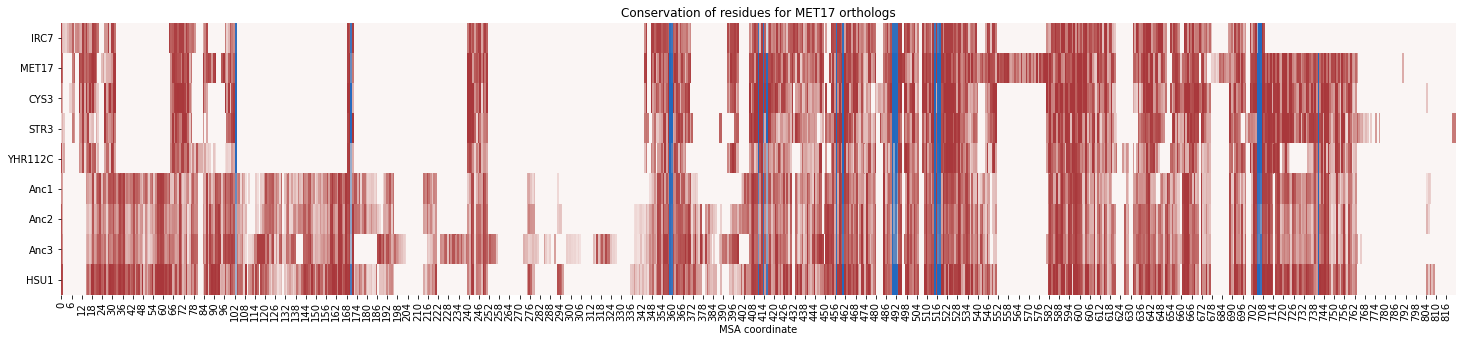

In [82]:
#Plot conservation scores as a heatmap
fig, ax = plt.subplots(figsize=[25,5])

expanded_cons_scores = {}
for msa_group_name, (msa_dir, sc_index, sc_index_genename) in msa_groups.items():
    expanded_cons_score = []
    for jj in aln_coord_map[sc_index]:
        if isinstance(jj,int):
            expanded_cons_score.append(msa_group_data[msa_group_name]['conservation'][jj])
        else:
            expanded_cons_score.append(0)
    expanded_cons_scores[msa_group_name]= expanded_cons_score

expanded_cons_scores_df = pd.DataFrame.from_dict(expanded_cons_scores, orient='index')

#If residue is active, color it blue. 
cat_res_map = pd.read_csv(met_proj_fname_base_win + os.sep + 'catalytic_residue_mapping.csv')

expanded_cons_scores_cat_highlight= expanded_cons_scores_df.copy()
for ind in cat_res_map['Overall Alignment']: 
    if not(np.isnan(ind)):
        expanded_cons_scores_cat_highlight.loc[:,ind-1] = -1*expanded_cons_scores_cat_highlight.loc[:,ind-1]

sns.heatmap(expanded_cons_scores_cat_highlight, cmap=  sns.color_palette("vlag", as_cmap=True), vmin=-1, vmax = 1, ax = ax, cbar=False) #sns.light_palette("red"))
ax.set_xlabel('MSA coordinate')
ax.set_title('Conservation of residues for MET17 orthologs')

fig.savefig(met_proj_fname_base_win + os.sep + 'met17_sc_ortholog_conservation_raw.svg')
#sns.heatmap(ohnologs_goi_prom_counts_sorted, vmax = 2, ax=ax_STRE, cmap=sns.light_palette("red"), cbar_kws={'ticks':[0,1,2]}) #, 'yticklabels':['0', '1', '>1']})

## Broad conservation comparison for key pairs of proteins: 
Met17 vs Hsu1 
Met17 Vs STR2/082 Ancestor
STR2/082 Vs HSU1 
STR2 Vs 082 

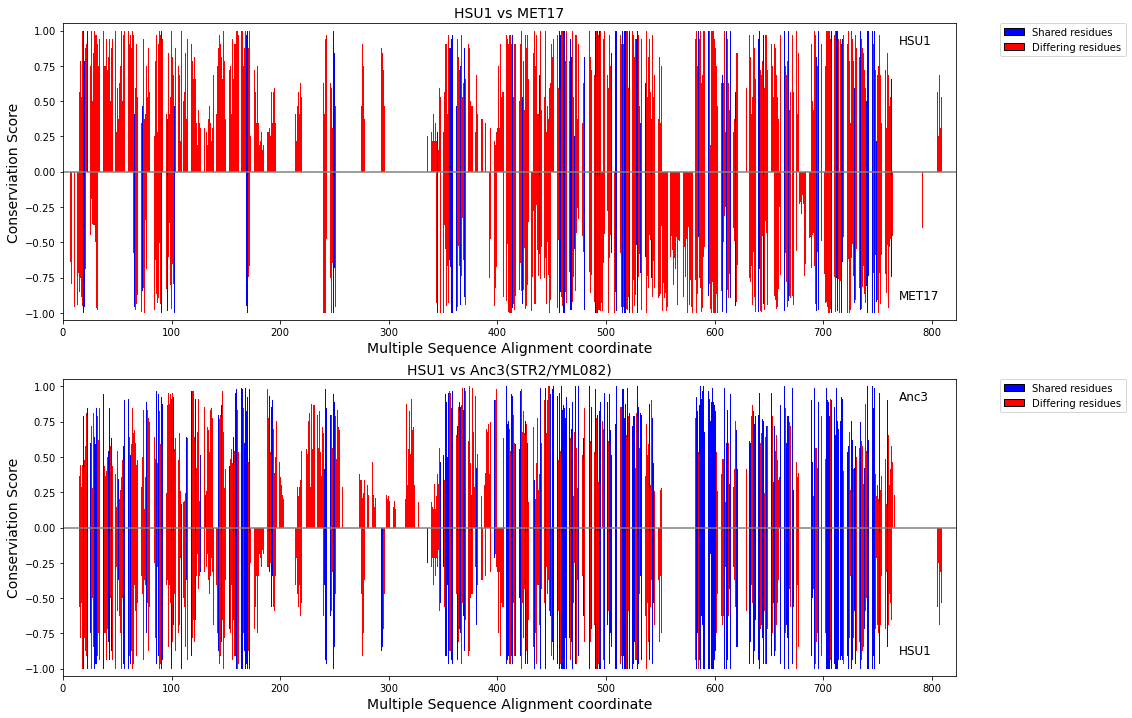

In [24]:
prot_pairs = {'HSU1 vs MET17': ('HSU1', 'MET17'), 
              #'Anc3(STR2/YML082) vs MET17': ('Anc3', 'MET17'), 
              'HSU1 vs Anc3(STR2/YML082)': ('Anc3', 'HSU1')
             }
              

fig, axarr = plt.subplots(2,1, figsize=(16,12))



for jj, (prot_pair_name, (top_group, bottom_group)) in enumerate(prot_pairs.items()):
    ax = axarr[jj]

    #top_group = 'HSU1'
    #bottom_group = 'MET17'
    cons_top = msa_group_data[top_group]['conservation']
    seq_top = msa_group_data[top_group]['refseq_no_gaps']
    mapping_top = aln_coord_map[msa_groups[top_group][1]]
    cons_bottom = msa_group_data[bottom_group]['conservation']
    seq_bottom = msa_group_data[bottom_group]['refseq_no_gaps']
    mapping_bottom = aln_coord_map[msa_groups[bottom_group][1]]

    #Find matches
    match_set = []

    for jj in range(len(mapping_top)):
        kk_top = mapping_top[jj]
        kk_bottom = mapping_bottom[jj]

        if not( (kk_top=='-')|(kk_bottom == '-') ): 
            res_top=seq_top[kk_top]
            res_bottom = seq_bottom[kk_bottom]
            if res_top==res_bottom:
                match_set.append(1)
            else: 
                match_set.append(0)
        else: 
            match_set.append(0)


    match_inds = [jj for jj,match_ind in enumerate(match_set) if match_ind==1]
    nomatch_inds = [jj for jj,match_ind in enumerate(match_set) if match_ind==0]

    cons_top_match = []
    cons_bottom_match = []
    for ind in match_inds: 
        cons_top_match.append(cons_top[mapping_top[ind]])
        cons_bottom_match.append(cons_bottom[mapping_bottom[ind]])

    cons_top_nomatch = []
    cons_bottom_nomatch = []
    for ind in nomatch_inds: 
        if mapping_top[ind]=='-':
            cons_top_nomatch.append(0)
        else: 
            cons_top_nomatch.append(cons_top[mapping_top[ind]])
        if mapping_bottom[ind]=='-':
            cons_bottom_nomatch.append(0)
        else: 
            cons_bottom_nomatch.append(cons_bottom[mapping_bottom[ind]])


    ax.bar(match_inds, cons_top_match, color = 'blue')
    ax.bar(match_inds, -1*np.array(cons_bottom_match), color = 'blue')
    
    ax.bar(nomatch_inds, cons_top_nomatch, color = 'red')
    ax.bar(nomatch_inds, -1*np.array(cons_bottom_nomatch), color = 'red')
        

    legend_elements = [Patch(facecolor='blue', edgecolor='k', label='Shared residues'), 
                    Patch(facecolor='red', edgecolor='k', label='Differing residues')
                   ]

    xlims = [0,len(mapping_top)]
    ax.set_ylim([-1.05, 1.05])
    ax.set_xlim(xlims)
    ax.text(770,0.90, top_group,fontdict={'size':'12'})
    ax.text(770,-0.90, bottom_group, fontdict={'size':'12'})
    ax.set_xlabel('Multiple Sequence Alignment coordinate', fontdict={'size':'14'})
    ax.set_ylabel('Conserviation Score', fontdict={'size':'14'})
    ax.set_title(prot_pair_name, fontdict={'size':'14'})
    ax.hlines(0,xlims[0],xlims[1], colors='grey')
    ax.legend(handles = legend_elements, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

fig.savefig(met_proj_fname_base_win + os.sep +  'met_orth_pairwise_conservation_raw.svg', bbox_inches='tight')       
        

    

## Conservation plots for key residues
old key_res_list = ['F280', 'V285', 'P510', 'S511','K281', 'H527', 'H528']
New list is all residues from Messerschmidt et al 1998 (CYS3) and Clausen et al 1998 (e.coli cystathionine gamma synthase)

Other old notes on key residues: 
key_res_list = ['F280', 'V285', 'P510', 'S511','K281', 'H527', 'H528']

# cys3_to_hsu1_map = {'Y104': 'F280', 
#                     'R109': 'V285', 
#                     'E334': 'P510', 
#                     'S335': 'S511', 
#                     'G105': 'K281',
#                     'H351': 'H527',
#                     'G352': 'H528'
#                    }

#CYS3 numbering
#['G105', 'H351', 'G352']  #'Y104', 'R109', 'E334', 'S335', 

#['Y49', 'R51']

#['Y49', 'R51','G79','S80', 'Y103', 'R108', 'E145', 'D178','F181', 'T180', 'S200', 'T202','K203', 'E333', 'L335', 'R369']


#loop = ['Y49', 'R51']
#Conserved = ['G79', 'E145','D178', 'T180', 'T202', 'K203', 'R369']
#main_group_sep = ['S80', 'F181', 'E333']

#IRC7 = ['S200']

#STR2_HSU = ['Y103', 'R108', 'L335']


#metB 'E325', 
#V349 STR3
# A380 Met17 (HCS), Neutral?
# P579 STR2 CGS), attract?
# P510 HSU1 (CGS), attract

In [83]:
#Filter out residues that are part of the extra domain in HSU1 and STR2 (Y49, R51)
cat_res_map_filt = cat_res_map[cat_res_map['HSU1'] != 'Extra Domain']
#Filter out residue that we couldn't map to sc ortholog alignment (from bacterial CGS)
cat_res_map_filt = cat_res_map_filt.dropna(subset=['Overall Alignment'])

In [85]:
len(cat_res_map_filt)

18

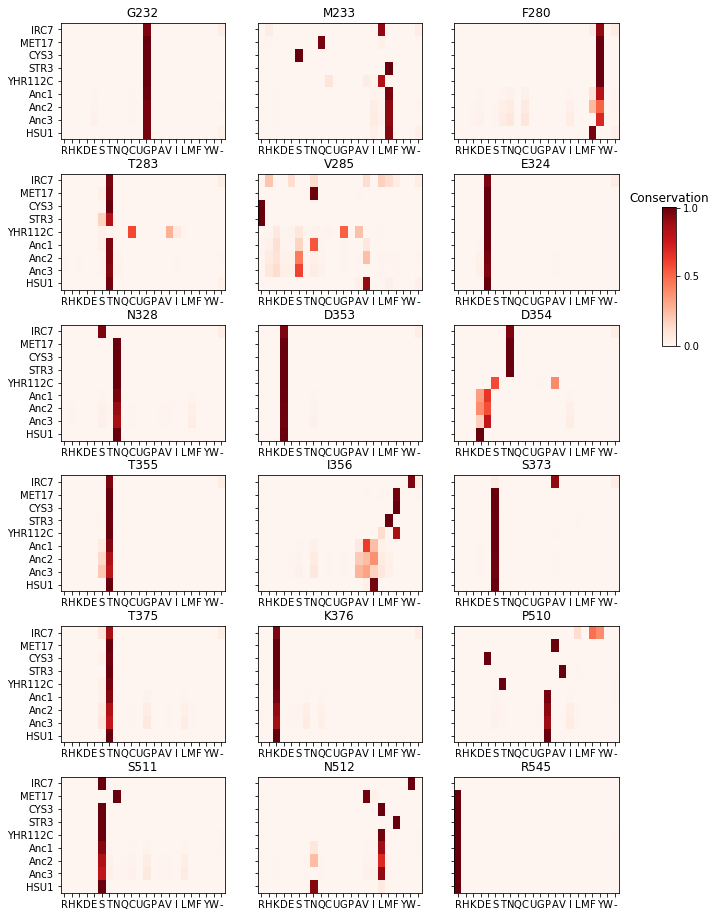

In [86]:
fig, axarr = plt.subplots(6,3, figsize=(10,16), sharey=True)

#aa_list = 'RHKDESTNQCUGPAVILMFYW-'

for jj, aln_ind in enumerate(cat_res_map_filt['Overall Alignment']):
    ax = axarr.flatten()[jj]
    
    cons_data_all = []
    
    for msa_group_name, (msa_dir, sc_index, sc_index_genename) in msa_groups.items():
        mapping = aln_coord_map[sc_index]
        mapped_ind = mapping[int(aln_ind-1)]
        if mapped_ind == '-': 
            mapped_data = pd.Series([0]*len(aa_list), index = [aa for aa in aa_list])
        else: 
            mapped_data = msa_group_data[msa_group_name]['conservation_data'].loc[mapped_ind,:]
        cons_data_all.append(mapped_data)
        
    im = ax.imshow(np.array(cons_data_all), cmap = 'Reds', aspect='auto')
    
    if jj==1:
        cbar_ax = fig.add_axes([0.96, 0.6, 0.02, 0.12])
        cbar_ax.set_title('Conservation')
        ticks = [0, 0.5, 0.99]
        cbar = fig.colorbar(im, cax=cbar_ax, ticks=ticks)

        #cbar.set_ticks(ticks)
        cbar.set_ticklabels(['0.0', '0.5', '1.0'])  #['{:.2f}'.format(tick) for tick in ticks])

    
    ax.set_xticks(np.arange(len(aa_list)))
    ax.set_yticks(np.arange(len(msa_groups)))
    # ... and label them with the respective list entries
    ax.set_xticklabels(aa_list)
    ax.set_yticklabels(msa_groups.keys())
    ax.set_title(cat_res_map_filt.iloc[jj,5])  #5 is the index of the HSU1 column

fig.subplots_adjust(hspace=.3)
fig.savefig(met_proj_fname_base_win + os.sep +  'cat_residue_conservation_all.svg', bbox_inches='tight')


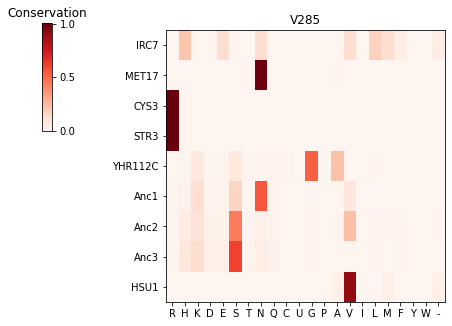

In [90]:
#Plot Conservation of F280

fig, ax = plt.subplots(1,1, figsize=(5,5), sharey=True)

#aa_list = 'RHKDESTNQCUGPAVILMFYW-'

key_res = 'V285'#'P510'#'S511'#'N512' #F280

key_res_mapping = cat_res_map_filt.loc[cat_res_map_filt['HSU1']==key_res,:]
aln_ind = int(key_res_mapping['Overall Alignment'])

   
cons_data_all = []
    
for msa_group_name, (msa_dir, sc_index, sc_index_genename) in msa_groups.items():
    mapping = aln_coord_map[sc_index]
    mapped_ind = mapping[int(aln_ind-1)]
    if mapped_ind == '-': 
        mapped_data = pd.Series([0]*len(aa_list), index = [aa for aa in aa_list])
    else: 
        mapped_data = msa_group_data[msa_group_name]['conservation_data'].loc[mapped_ind,:]
    cons_data_all.append(mapped_data)

im = ax.imshow(np.array(cons_data_all), cmap = 'Reds', aspect='auto')

cbar_ax = fig.add_axes([-0.22, 0.6, 0.03, 0.3])
cbar_ax.set_title('Conservation')
ticks = [0, 0.5, 0.99]
cbar = fig.colorbar(im, cax=cbar_ax, ticks=ticks)

#cbar.set_ticks(ticks)
cbar.set_ticklabels(['0.0', '0.5', '1.0'])  #['{:.2f}'.format(tick) for tick in ticks])


ax.set_xticks(np.arange(len(aa_list)))
ax.set_yticks(np.arange(len(msa_groups)))
# ... and label them with the respective list entries
ax.set_xticklabels(aa_list)
ax.set_yticklabels(msa_groups.keys())
ax.set_title(key_res_mapping.iloc[0,5])  #5 is the index of the HSU1 column

#fig.subplots_adjust(hspace=.3)
fig.savefig(met_proj_fname_base_win + os.sep +  'cat_residue_conservation_'+ key_res + '_raw.svg', bbox_inches='tight')

# Phylogenetic tree of blast orthologs from all the different main orthology groups. 

In [1]:
import networkx as nx

#for scraping internet data (e.g. ncbi, YGOB)
import requests
#from bs4 import BeautifulSoup
from lxml import etree    #parses xml output

In [ ]:
#pblast searches (presumably using default search parameters) were performed on 12 Sep 2021. For each search Alignment-HitTable_[query_name].csv and model_blast_[query_name].txt were saved. 
#
#Alignment Hit Table has the following columns: 
#Fields: query acc.ver, subject acc.ver,
# FRom C to M 
#% identity, alignment length, mismatches, gap opens, q. start, q. end, s. start, s. end, evalue, bit score, % positives

#I believe I used a heuristic to choose matching sequences - picking those new sequences that didn't overlap from sequences I had seen before, going out to e.coli. 
#Evalue Max:
#YML082 6.52e-11
#YLL058W 6.52e-9
#STR2 0.046
#STR3 6.52E-60
#


In [4]:
#Combine fastas for all proteins
sc_orths = ['CYS3','MET17', 'STR3', 'YHR112C', 'IRC7', 'STR2', 'YLL058W', 'YML082W']

metproj_data_dir = os.path.normpath('C:/Users/heineib/Google Drive/Crick_LMS/projects/jason_met_auxotrophy') + os.sep


orths_non_redundant = []
orth_names = []


for sc_orth in sc_orths: 
    
    fasta_fname = metproj_data_dir + 'model_blast_' + sc_orth + '.txt'
    orth_seqs = SeqIO.parse(fasta_fname, 'fasta')
    
    for orth_seq in orth_seqs: 
        if not(orth_seq.name in orth_names): 
            orths_non_redundant.append(orth_seq)
            orth_names.append(orth_seq.name)
            
    



# #Identify sequences that are identical or close to identical and remove one


# #I used these parameters for mapping proteins between two proteomes that should have been identical - not sure if they are ideal (20190820_map_YGOB_to_y1000)
# match_points = 1
# mismatch_points = -1
# gap_open = -.5
# gap_extension = -0.1
# NN_top_scores = 5


# score = pairwise2.align.globalms(seq_study2,seq_study1, match_points, mismatch_points, gap_open, gap_extension, penalize_end_gaps = False, score_only = True )

# # for jj, orth_seq_jj in orth_seqs: 
# #     for kk, orth_seq_kk in orth_seqs: 
        

# #Make MSA

# #Make Table

In [5]:

#I used these parameters for mapping proteins between two proteomes that should have been identical - not sure if they are ideal
match_points = 1
mismatch_points = -1
gap_open = -.5
gap_extension = -0.1
NN_top_scores = 5

penalize_end_gaps = False #I decided to not penalize end gaps - and then make decisions about similar proteins based on side by side comparison of length. 

scores = np.zeros((len(orths_non_redundant), len(orths_non_redundant)))
for jj, orth_seq_jj in enumerate(orths_non_redundant): 
    for kk, orth_seq_kk in enumerate(orths_non_redundant):
        if kk >= jj: #Since scores are symmetric, this speeds up the calculation. 
            scores[jj,kk]= pairwise2.align.globalms(orth_seq_jj, orth_seq_kk, match_points, mismatch_points, gap_open, gap_extension, penalize_end_gaps = penalize_end_gaps, score_only = True )
            scores[kk,jj]= scores[jj,kk]

# # score = pairwise2.align.globalms(orth_seq_jj, orth_seq_kk, match_points, mismatch_points, gap_open, gap_extension, penalize_end_gaps = penalize_end_gaps, score_only = True )

# orth_seq_jj = orths_non_redundant[0]
# orth_seq_kk = orths_non_redundant[0]

# score =


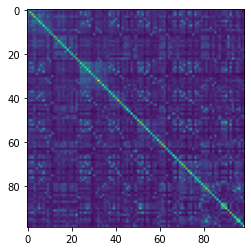

In [6]:
plt.imshow(scores)

In [9]:
tol = 60
elist = []
for jj in range(len(orths_non_redundant)): 
    for kk in range(len(orths_non_redundant)): 
        if kk>jj: 
            score = scores[jj,kk]
            scorediff_jj = scores[jj,jj] - score 
            scorediff_kk = scores[kk,kk] - score
            
            if (scorediff_jj <= tol) | (scorediff_kk <= tol):
                elist.append((jj,kk))
                
G = nx.Graph()
G.add_edges_from(elist)

groups = nx.connected_components(G)

for group_set in list(groups): 
    group_list = list(group_set)
    
    print('Group of {} proteins have scores within a tolerance of {}'.format(len(group_list), tol))
    
    for seq_no in group_list: 
        seq = orths_non_redundant[seq_no]
        print('{} len={}'.format(seq.id, len(seq.seq)))
        print('Description: {}'.format(seq.description))

Group of 2 proteins have scores within a tolerance of 60
XP_002552884.1 len=444
Description: XP_002552884.1 KLTH0D03652p [Lachancea thermotolerans CBS 6340]
XP_002552844.1 len=392
Description: XP_002552844.1 KLTH0D02728p [Lachancea thermotolerans CBS 6340]
Group of 2 proteins have scores within a tolerance of 60
NP_997769.3 len=404
Description: NP_997769.3 cystathionine gamma-lyase [Danio rerio]
AAH56538.1 len=400
Description: AAH56538.1 Cystathionase (cystathionine gamma-lyase) [Danio rerio]
Group of 2 proteins have scores within a tolerance of 60
NP_495449.1 len=392
Description: NP_495449.1 Putative cystathionine gamma-lyase 2 [Caenorhabditis elegans]
NP_507053.1 len=392
Description: NP_507053.1 Gamma-cystathionase [Caenorhabditis elegans]
Group of 2 proteins have scores within a tolerance of 60
KGR15907.1 len=404
Description: KGR15907.1 cystathionine beta-lyase [Candida albicans P78048]
XP_719538.1 len=404
Description: XP_719538.1 cystathionine beta-lyase [Candida albicans SC5314]
G

In [11]:
#After looking in NCBI these both come from the same source and were on different scaffolds - they could be the same gene, but have a few differences, so will keep them in. 

#Remove List: 

rem_list = ['AAH56538.1',
'NP_495449.1',
'KGR15907.1',
'NEY29643.1',
'HBD5831986.1',
'GAV50451.1',
'GAV55096.1',
'KAG2008624.1',
'XP_012052639.1',
'XP_776215.1',
'KAF6061935.1',
'RDW23921.1',
'BAA8722.1', #Pombe - not removed yet
'BAA86226.1',
'NEY25832.1']

ind_remove = []
for jj, orth in enumerate(orths_non_redundant): 
    if orth.id in rem_list: 
        ind_remove.append(jj)

ind_remove.reverse()
ind_remove

for ind in ind_remove: 
    orths_non_redundant.pop(ind)


In [34]:
# Make a Fasta of non-redundant sequences and IDs for phylogenetic tree

model_blast_comb_fname = metproj_data_dir + 'model_blast_comb.fasta'

with open(model_blast_comb_fname, 'w') as f: 
    for record in orths_non_redundant: 
        #Extract organism name from ncbi
        protein_id = record.id
        protein_data_url = 'http://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?db=protein&id=' + protein_id + '&rettype=gp&retmode=xml'
        protein_data_response = requests.get(protein_data_url) 
        if protein_data_response.ok:
            protein_data_xml = etree.fromstring(protein_data_response.content)
            #entrezgene_element = gene_data_xml.getchildren()[0]
            #locus_element = entrezgene_element.find('Entrezgene_locus')
        else: 
            print(protein_id + ' not found')
            
        for item in list(protein_data_xml)[0].iter("GBSeq_organism"): 
            spec = item.text
        
        fasta_line1 = '>' + '_'.join(spec.split()) + '__' + protein_id + '\n'
        print(fasta_line1)
        f.write(fasta_line1)
        f.write(str(record.seq) + '\n')
    
    #Add on S. cerevisiae strains
    sc_proteins =   {'MET17': 'YLR303W',
                  'STR2': 'YJR130C', 
                  'YLL058W':'YLL058W', 
                  'STR3': 'YGL184C', 
                  'CYS3': 'YAL012W',
                  'YHR112C': 'YHR112C',
                  'IRC7': 'YFR055W', 
                  'YML082W': 'YML082W'
                 }
    
    for sc_name, sc_genename in sc_proteins.items(): 
        prot_file = metproj_data_dir + 'S288C_' + sc_genename + '_' + sc_name + '_protein.fsa'
        with open(prot_file) as f_in: 
            prot_data = list(f_in)
            f.write('>Saccharomyces_cerevisiae__' + sc_name + '\n')
            f.write(''.join(prot_data[1:]).replace('\n','') + '\n')

    
    

>Saccharomyces_paradoxus__XP_033764461.1

>Naumovozyma_castellii_CBS_4309__XP_003676991.1

>Torulaspora_delbrueckii__XP_003683423.1

>Kluyveromyces_marxianus_DMKU3-1042__XP_022674682.1

>Eremothecium_gossypii_ATCC_10895__NP_984519.1

>Zygosaccharomyces_rouxii__XP_002496684.1

>Lachancea_thermotolerans_CBS_6340__XP_002552844.1

>Wickerhamomyces_anomalus_NRRL_Y-366-8__XP_019038925.1

>Debaryomyces_hansenii_CBS767__XP_458365.1

>Candida_albicans_SC5314__XP_716241.1

>Yarrowia_lipolytica_CLIB122__XP_505053.1

>Komagataella_pastoris__ANZ76431.1

>Mus_musculus__NP_666065.1

>Drosophila_melanogaster__NP_001286578.1

>Homo_sapiens__NP_001893.2

>Salpingoeca_rosetta__XP_004989766.1

>Escherichia_coli__MXG70174.1

>Caenorhabditis_elegans__NP_507053.1

>Arabidopsis_thaliana__NP_001326868.1

>Escherichia_coli__EFC7622777.1

>Candida_albicans_SC5314__XP_719538.1

>Yarrowia_lipolytica_CLIB122__XP_502248.1

>Naumovozyma_castellii_CBS_4309__XP_003673522.1

>Lachancea_thermotolerans_CBS_6340__XP_002552

In [68]:
# #Add on S. cerevisiae strains
# sc_proteins =   {'MET17': 'YLR303W',
#                   'STR2': 'YJR130C', 
#                   'YLL058W':'YLL058W', 
#                   'STR3': 'YGL184C', 
#                   'CYS3': 'YAL012W',
#                   'YHR112C': 'YHR112C',
#                   'IRC7': 'YFR055W', 
#                   'YML082W': 'YML082W'
#                  }
    
# sc_combined_fname = metproj_data_dir + 'sc_proteins.fasta'
    
# with open(sc_combined_fname, 'w') as f: 
#     for sc_name, sc_genename in sc_proteins.items(): 
#         prot_file = metproj_data_dir + 'S288C_' + sc_genename + '_' + sc_name + '_protein.fsa'
#         with open(prot_file) as f_in: 
#             prot_data = list(f_in)
#             f.write('>Saccharomyces_cerevisiae__' + sc_name + '\n')
#             f.write(''.join(prot_data[1:]).replace('\n','') + '\n')


In [35]:
#Mafft Command for all proteins

protein_fname_base = '/home/heineike/Crick_LMS/projects/jason_met_auxotrophy/model_blast_comb'

#Command:   mafft v 7.487
mafft_command = ['mafft', '--genafpair', '--maxiterate', '1000', 
                 protein_fname_base + '.fasta', 
                '>',
                 protein_fname_base + '_aln.fasta']


print(" ".join(mafft_command))


#Trimming Command: 
#trimal 1.2r59
#Had to install g++ on the linux system to make the program.  
trimal_command = ['/home/heineike/trimAl/source/trimal',
                  '-in',  protein_fname_base + '_aln.fasta', 
                  '-out',  protein_fname_base + '_aln_trimmed.fasta', 
                  '-gappyout']

print("\nTrimal command\n")
print(" ".join(trimal_command))

mafft --genafpair --maxiterate 1000 /home/heineike/Crick_LMS/projects/jason_met_auxotrophy/model_blast_comb.fasta > /home/heineike/Crick_LMS/projects/jason_met_auxotrophy/model_blast_comb_aln.fasta

Trimal command

/home/heineike/trimAl/source/trimal -in /home/heineike/Crick_LMS/projects/jason_met_auxotrophy/model_blast_comb_aln.fasta -out /home/heineike/Crick_LMS/projects/jason_met_auxotrophy/model_blast_comb_aln_trimmed.fasta -gappyout


In [36]:
#iqtree_command
outgroup_id = 'Escherichia_coli__EEV6508859.1'

#iqtree-1.6.12 linux 64 bit
iqtree_command = ["/home/heineike/iqtree-1.6.12-Linux/bin/iqtree", 
                  "-s" , protein_fname_base + '_aln_trimmed.fasta',
                  "-m", 'LG+R5',  #Ran once without this flag and determined best model was LG+R5
                  "-nt", "AUTO",  #automatically determines number of threads 
                  "-o", outgroup_id]
print(" ".join(iqtree_command))

/home/heineike/iqtree-1.6.12-Linux/bin/iqtree -s /home/heineike/Crick_LMS/projects/jason_met_auxotrophy/model_blast_comb_aln_trimmed.fasta -m LG+R5 -nt AUTO -o Escherichia_coli__EEV6508859.1


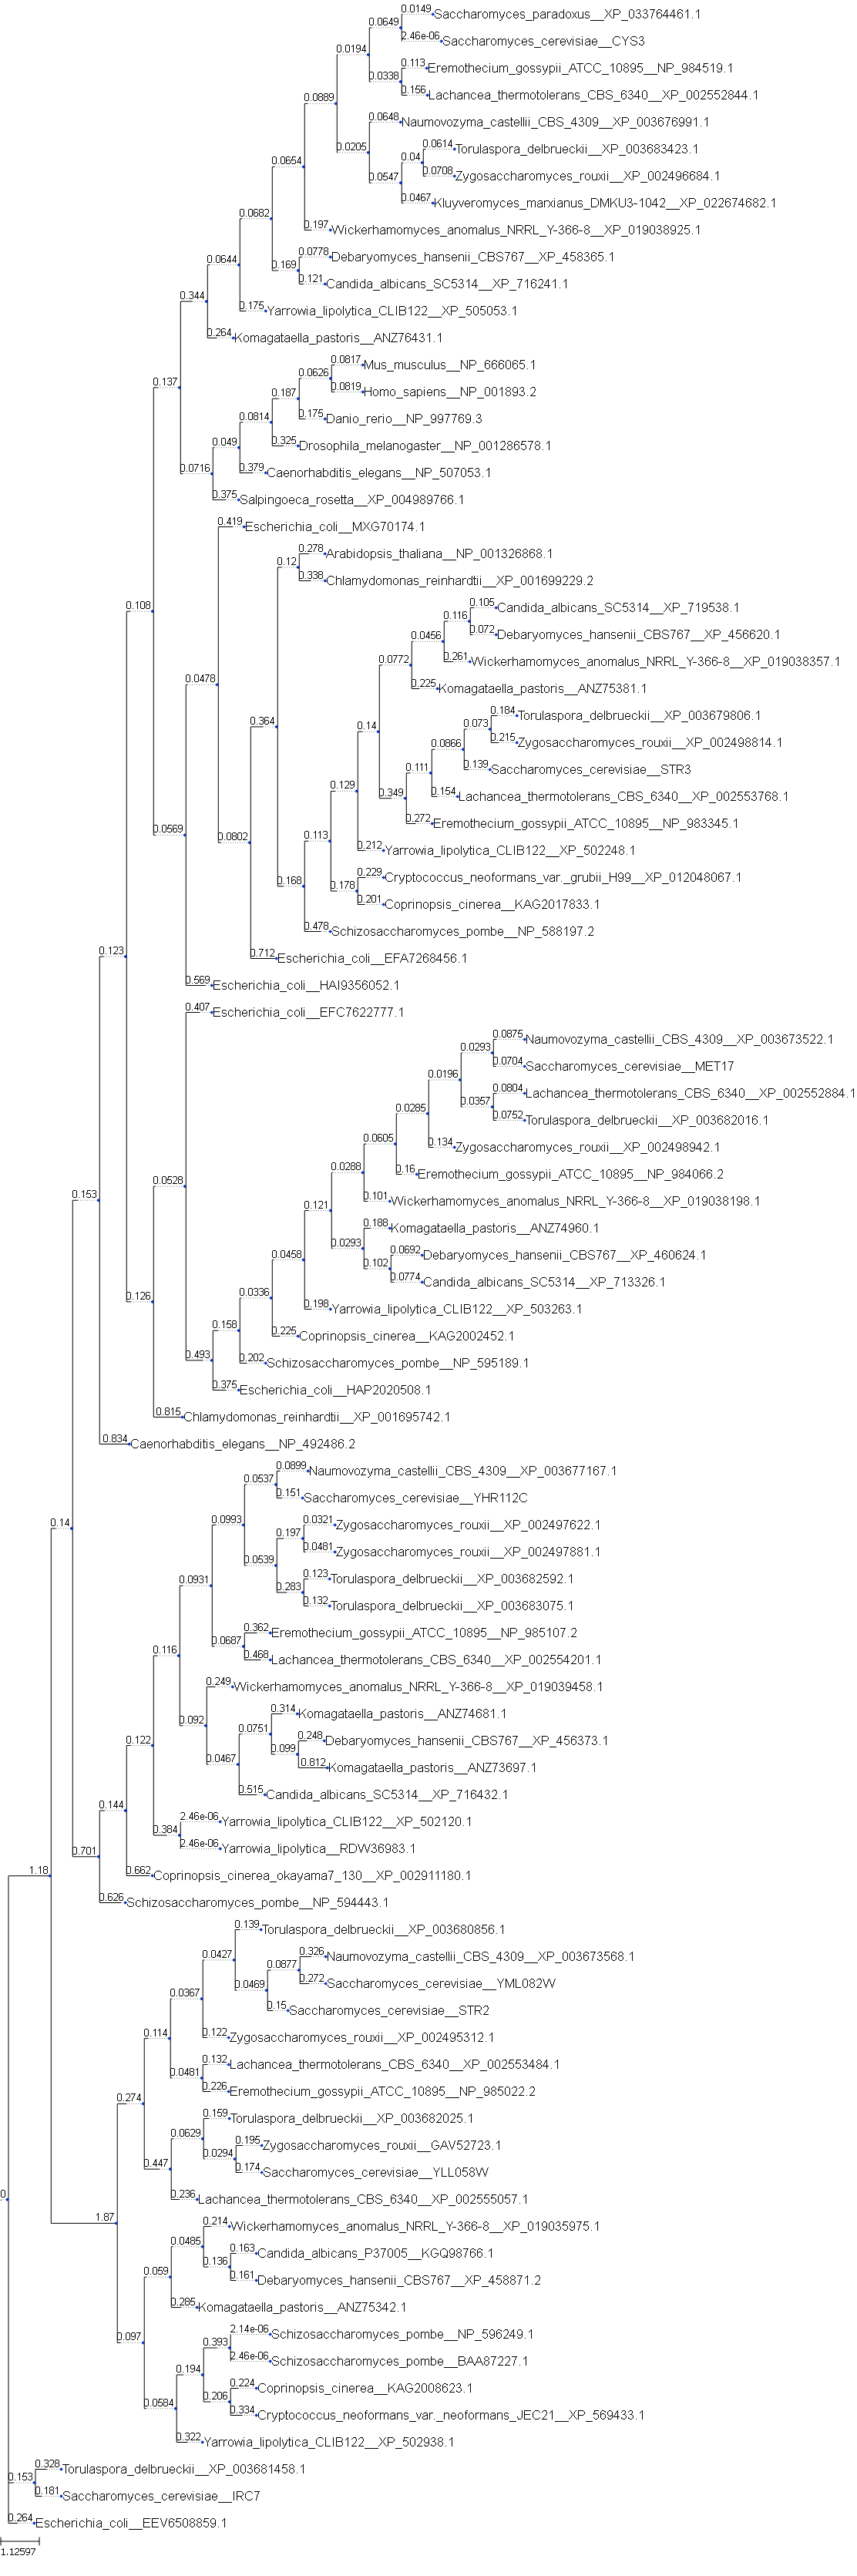

In [6]:
#Basic tree plot

fname_tree = metproj_data_dir +  'model_blast_comb_aln_trimmed.fasta.treefile'

t = Tree(fname_tree, format=1)  
ts = TreeStyle()
ts.show_leaf_name = True
ts.show_branch_length = True

# for node in t.traverse():
#     if node.is_leaf():
#         name_face = AttrFace("name",fsize=20)
#         node.add_face(name_face, column=0, position="branch-right")  
#     else:
#     #if not(node.is_leaf()):
#         node_label = TextFace(node.name)
#         node.add_face(node_label, column=1, position = "branch-bottom")
t.render('%%inline', tree_style=ts)

# fname_out = figsave_dir + goi + '_basic_tree.pdf' 
# t.render(fname_out, tree_style=ts)

In [9]:
#print out list of unique species in order to build group map
spec_list = []
for node in t.traverse():
    if node.is_leaf():
        spec_list.append(node.name.split('__')[0])
list(set(spec_list))

In [17]:
group_map = {'Drosophila_melanogaster': 'Anamalia', 
 'Saccharomyces_cerevisiae': 'S. cerevisiae', 
 'Wickerhamomyces_anomalus_NRRL_Y-366-8': 'Ascomycota', 
 'Torulaspora_delbrueckii': 'Ascomycota',
 'Debaryomyces_hansenii_CBS767': 'Ascomycota',
 'Chlamydomonas_reinhardtii': 'Plantae',
 'Coprinopsis_cinerea': 'Other Fungi',
 'Mus_musculus': 'Anamalia',
 'Yarrowia_lipolytica_CLIB122': 'Ascomycota',
 'Lachancea_thermotolerans_CBS_6340': 'Ascomycota',
 'Zygosaccharomyces_rouxii': 'Ascomycota',
 'Cryptococcus_neoformans_var._grubii_H99': 'Other Fungi', 
 'Escherichia_coli':'Bacteria',
 'Candida_albicans_SC5314': 'Ascomycota',
 'Cryptococcus_neoformans_var._neoformans_JEC21': 'Other Fungi',
 'Homo_sapiens': 'Anamalia',
 'Kluyveromyces_marxianus_DMKU3-1042': 'Ascomycota',
 'Komagataella_pastoris': 'Ascomycota',
 'Caenorhabditis_elegans': 'Anamalia',
 'Arabidopsis_thaliana': 'Plantae',
 'Coprinopsis_cinerea_okayama7_130': 'Other Fungi',
 'Naumovozyma_castellii_CBS_4309': 'Ascomycota',
 'Saccharomyces_paradoxus': 'Ascomycota',
 'Schizosaccharomyces_pombe': 'Ascomycota',
 'Candida_albicans_P37005': 'Ascomycota',
 'Danio_rerio': 'Anamalia',
 'Eremothecium_gossypii_ATCC_10895': 'Ascomycota',
 'Salpingoeca_rosetta': 'Choanoflagellata',
 'Yarrowia_lipolytica': 'Ascomycota'
            }

color_map = {'S. cerevisiae': '#fffb05',
             'Ascomycota': '#e6d97e', 
             'Other Fungi': '#d4bf22'  , 
             'Anamalia': '#f5756c',
             'Choanoflagellata': '#e378c3' ,
             'Plantae': '#79c265',
             'Bacteria': '#c2c2c2'
            }

In [ ]:
#Plot phylogenetic tree coloring by group
ts = TreeStyle()
ts.show_leaf_name = True #False

t.ladderize()

#For each node in the tree:
for node in t.traverse(): 
    #name_face = AttrFace("name",fsize=15)
    #node.add_face(name_face, column=0, position="branch-right")     
    if node.is_leaf():#Get the promoter sequence with motif info, make it into a motif list
        species = node.name.split('__')[0]
        #Color node based on species group

        spec_group = group_map[species]
        node_color = color_map[spec_group]

        nstyle = NodeStyle()
        nstyle['bgcolor']=node_color
        node.set_style(nstyle)

#t.render('%%inline', tree_style=ts)

fname_out = metproj_data_dir +  'model_tree_base.svg'
t.render(fname_out, tree_style=ts)

In [ ]:
# Boilerplate code for tree decoration
#     ts = TreeStyle()
#     ts.show_leaf_name = True #False
#     if branch_labels == 'all':
#         ts.show_branch_length = True
#     else:
#         ts.show_branch_length = False

#     t.ladderize()
#     L_prom = 700
#     height = 15
#     seq = '-'*L_prom

#     motif_colors = {'PDS': 'yellow', 'TATA': 'blue', 'STRE': 'red'}
#     motif_lengths = {'PDS': 3*6, 'TATA': 3*8, 'STRE': 3*5 }  #They are triple the size

#     #box params:
#     width_box = 40
#     height_box = 55

#     cmap_STRE = cm.get_cmap('Reds')
#     vmin = 0.0
#     vmax = 8.0
#     cmap_STRE_norm = colors.Normalize(vmin=vmin, vmax=vmax)

#     cmap_TATA = cm.get_cmap("Blues")

#     cmap_exp = cm.get_cmap('coolwarm')
#     vmin = -7.5
#     vmax = 7.5
#     cmap_exp_norm = colors.Normalize(vmin=vmin, vmax=vmax)
#     nan_color = '#808080'

#     conds = list(goi_exp_data.columns)


#     # To get rid of a set of species for the visualization
#     # if less_nonsacc: 
#     #     nonsacc_visualization_subset = pd.read_csv(y1000plus_dir + 'species_visualization_subset.csv')
#     #     species_subset = ( set(nonsacc_visualization_subset['original_genome_id']) | \
#     #                        set(y1000_species[y1000_species['Major clade']=='Saccharomycetaceae']['original_genome_id']) ) # | \
#     #                        #set(y1000_species[y1000_species['Species name']==outgroup]['original_genome_id'])
#     #                      #)
#     #     y1000_species_subset = y1000_species[(y1000_species['original_genome_id'].isin(species_subset))]
#     #     node_subset = []
#     #     #For each node in the tree:
#     #     for node in t.iter_leaves():  
#     #         #Get the promoter sequence with motif info, make it into a motif list
#     #         if 'saccharomyces_cerevisiae' in node.name:
#     #             species='saccharomyces_cerevisiae'
#     #         else: 
#     #             species = '_'.join(node.name.split('_')[:-2])
#     #         if species in species_subset: 
#     #             node_subset.append(node.name)

#     #     t.prune(node_subset)
#     #     t.ladderize()

#     # for node in t.iter_leaves():  
#     #     print(node.name)

#     #For each node in the tree:
#     for node in t.traverse(): 
#         #name_face = AttrFace("name",fsize=15)
#         #node.add_face(name_face, column=0, position="branch-right")     
#         if node.is_leaf():#Get the promoter sequence with motif info, make it into a motif list
#             if 'saccharomyces_cerevisiae' in node.name:       
#                 species='saccharomyces_cerevisiae'
#                 gene_id = species + '@' + node.name.split(species +'_')[1]
#             elif 'candida_albicans' in node.name: 
#                 species = 'candida_albicans'
#                 gene_id = species + '@' + node.name.split(species +'_')[1]
#             else: 
#                 species = '_'.join(node.name.split('_')[:-2])
#                 gene_id = species + '@' + '_'.join(node.name.split('_')[-2:])


#             #Color node based on species group

#             spec_group = exp_subset_goi[node.name][1]

#             if spec_group in {'high', 'low'}:
#                 node_color = post_WGH_colors[spec_group]
#             else:
#                 node_color = sacc_colors[spec_group]


#             nstyle = NodeStyle()
#             nstyle['bgcolor']=node_color
#             node.set_style(nstyle)

#             prom_results = proms.loc[gene_id]

#         #     simple_motifs = [
#         #             # seq.start, seq.end, shape, width, height, fgcolor, bgcolor
#         #             [10, 60, ">", None, 10, "black", "red", None],
#         #             [120, 150, "<", None, 10, "black", "red", None]
#         #     ]
#             motifs = []

#             for motif_name in motif_names: #, 'PDS']:   #Leaving out PDS
#                 motif_len = motif_lengths[motif_name]
#                 motif_color = motif_colors[motif_name]
#                 if prom_results[motif_name + '_count'] >0:

#                     for motif in prom_results[motif_name + '_full_features']:
#                         loc = motif[0]
#                         if loc <= L_prom:
#                             direction = motif[1]
#                             shape = '>'
#                             start = L_prom-loc
#                             stop = L_prom-loc + motif_len
#                             if direction == 'rev':
#                                 shape = '<'
#                                 start = L_prom-loc-motif_len
#                                 stop = L_prom -loc
#                             motifs.append([start,stop,shape,None, height, "black", motif_color, None])

#             seqFace = SeqMotifFace(seq, motifs=motifs, seq_format="-")
#             node.add_face(seqFace, column=0, position="aligned")


#             #Add face for STRE count within 700bp

#             motif_name = 'STRE'
#             L_STRE_count = 700

#             N_STRE = 0
#             for result in prom_results['STRE_full_features']:
#                 if result[0]<L_STRE_count:
#                     N_STRE = N_STRE+1

#             rgb = colors.to_hex(cmap_STRE(cmap_STRE_norm(N_STRE)))

#             rectFace_STRE = RectFace(width=width_box, height=height_box, fgcolor='black', bgcolor=rgb, 
#                                 label= {"text": str(N_STRE), 
#                                         "color": 'black', 
#                                         "fontsize": 20, 
#                                         "font": 'Verdana'
#                                        }
#                                )
#             node.add_face(rectFace_STRE, column = 1, position= "aligned")

#             #Add face for TATA box within 700bp
#             motif_name = 'TATA'
#             L_TATA = 300

#             TATA = 0.0
#             for result in prom_results['TATA_full_features']:
#                 if result[0]<L_TATA:
#                     TATA = 1.0

#             rgb = colors.to_hex(cmap_TATA(TATA))

#             rectFace_TATA = RectFace(width=width_box, height=height_box, fgcolor='black', bgcolor=rgb)

#             node.add_face(rectFace_TATA, column=2, position="aligned")


#             #add faces for expression data

#             for jj, cond in enumerate(conds):
#                 data_val = goi_exp_data.loc[exp_subset_goi[node.name][0],cond]

#                 if np.isnan(data_val): 
#                     rgb = nan_color
#                 else: 
#                     rgb = colors.to_hex(cmap_exp(cmap_exp_norm(data_val)))

#                 rectFace_exp_cond = RectFace(width=width_box, height=height_box, fgcolor='black', bgcolor=rgb)
#                 node.add_face(rectFace_exp_cond, column = 3+jj, position= "aligned")


#         else:  # If node is not a leaf, add the support label
#             if branch_labels=='all': 
#                 node_label = TextFace(node.name)
#                 node.add_face(node_label, column=1, position = "branch-bottom")
#             elif branch_labels =='bootstrap':
#                 node_label = TextFace(node.name.split('/')[0])
#                 node.add_face(node_label, column=1, position = "branch-top")
#             else: 
#                 raise ValueError('invalid value for branch_labels: {}'.format(branch_labels))


#     return t, ts


In [10]:
y1000_pres_abs = pd.read_table(os.path.normpath('C:/Users/heineib/Google Drive/Crick_LMS/projects/jason_met_auxotrophy/genesMatrix_PresenceAbsence.tab'))
y1000_pres_abs.set_index('STD_name', inplace=True)


## Species Tree for Federica's species

In [5]:
tree_fname = y1000plus_dir + 'shen_2018_data' + os.sep + '332_2408OGs_time-calibrated_phylogeny_species-names_updated.newick'
t = Tree(tree_fname)

ts = TreeStyle()
ts.show_leaf_name = False
#ts.show_branch_length = True

# for node in t.traverse():
#     if not(node.is_leaf()):
#         node_label = TextFace(node.name)
#         node.add_face(node_label, column=1, position = "branch-bottom")

# post_WGH_colors = {'low':  '#8cc3f6', # '#d3d3fe', #'#3192ff',#'#7eeaf7', ##2DD7ED',      #'#e6fcff', 
#                    'high': '#fcbba1'} #'#59E3EB'}  #'#ffebe6'}


node_color_dict = {'KLE':"#deb9f6",
                   'ZT': "YellowGreen",
                   'Post_WGH': "LightYellow",   #default color for post WGH
                   'low': '#8cc3f6',    #syntenic orthologs of low LFC ohnolog
                   'high': '#fcbba1',    #syntenic orthologs of high LFC ohnolog
                   'outgroup': 'LightGrey'
                  }

#K.lactis, K. marxianus, K. servazzii, W.anomalus, P.pastoris, C.albicans, C.tropicalis, D.hansenii, G.candidus, R.mucilaginosa, S.pombe, S.cerevisiae


leaves_to_view = {'Geotrichum_candidum':('outgroup', 'Ylip'),
                  'Komagataella_pastoris': ('outgroup','Kpas'),
                  'Debaryomyces_hansenii': ('outgroup','Dhan'),
                  'Candida_albicans': ('outgroup','Calb'),
                  'Candida_tropicalis': ('outgroup','Ctro'),
                  'Wickerhamomyces_anomalus': ('outgroup', 'Wano'), 
                 'Lachancea_thermotolerans':  ('KLE','Lthe'),
                  'Kluyveromyces_lactis': ('KLE','Klac'),
                  'Kluyveromyces_marxianus': ('KLE','Kmar'),
                  'Zygosaccharomyces_rouxii': ('ZT', 'Zrou'),
                  'Kazachstania_naganishii': ('Post_WGH','Knag'),
                  'Saccharomyces_cerevisiae': ('Post_WGH','Scer')

                 }

t.prune(leaves_to_view.keys())

t.ladderize()

for node in t.get_leaves():
    name = node.name
    group, abbrev = leaves_to_view[name]
    
    nstyle = NodeStyle()
    node_color = node_color_dict[group]
    nstyle['bgcolor']=node_color
    node.set_style(nstyle)
    
    node_label_face = TextFace(name) # + " ({})".format(abbrev)) #, fsize=16, fgcolor="black")
    node.add_face(node_label_face, column=1, position = "aligned")

fname = figsave_dir + 'experimental_species_raw.svg'
t.render(fname, tree_style=ts)
#t.render('%%inline', tree_style=ts)


{'nodes': [[0.5, 51.5, 4.5, 55.5, 0, None],
  [63.12909514357144, 9.0, 67.12909514357145, 13.0, 1, None],
  [52.08738323952783, 94.0, 56.08738323952783, 98.0, 2, None],
  [67.02459344008395, 46.5, 71.02459344008395, 50.5, 3, None],
  [102.8951572146971, 29.0, 106.8951572146971, 33.0, 4, None],
  [76.39788490842675, 64.0, 80.39788490842675, 68.0, 5, None],
  [114.01482600984238, 49.0, 118.01482600984238, 53.0, 6, None],
  [102.85147760485624, 79.0, 106.85147760485624, 83.0, 7, None],
  [122.4863932375486, 69.0, 126.4863932375486, 73.0, 8, None],
  [115.912949195143, 89.0, 119.912949195143, 93.0, 9, None],
  [78.2050055437805, 141.5, 82.2050055437805, 145.5, 10, None],
  [178.55479022987956, 109.0, 182.55479022987956, 113.0, 11, None],
  [109.15615109828346, 174.0, 113.15615109828346, 178.0, 12, None],
  [132.26422119011613, 144.0, 136.26422119011613, 148.0, 13, None],
  [177.80632798043058, 129.0, 181.80632798043058, 133.0, 14, None],
  [142.50891424530604, 159.0, 146.50891424530604, 16

In [26]:
#	X5460.YLL063C	X5461.YLL066W.B - removed these - missing in several hndred species
y1000_names = 'X5448.YLL051C	X5449.YLL052C	X5450.YLL053C	X5451.YLL054C	X5452.YLL055W	X5453.YLL056C	X5454.YLL057C	X5455.YLL058W	X5456.YLL059C	X5457.YLL060C	X5458.YLL061W	X5459.YLL062C'.split('\t')

for name in y1000_names: 
    print('{}: {} genes'.format(name, sum(y1000_pres_abs[name])))
    print(list(y1000_pres_abs[y1000_pres_abs[name]==0].index))





X5448.YLL051C: 1009 genes
['CPN', 'CPR']
X5449.YLL052C: 1009 genes
['CPN', 'CPR']
X5450.YLL053C: 1001 genes
['AHF', 'CPI', 'CPM', 'CPK', 'CPL', 'CPQ', 'CPN', 'CPR', 'BBM', 'CPA']
X5451.YLL054C: 1009 genes
['CPN', 'CPR']
X5452.YLL055W: 1009 genes
['CPN', 'CPR']
X5453.YLL056C: 1009 genes
['CPN', 'CPR']
X5454.YLL057C: 1009 genes
['CPN', 'CPR']
X5455.YLL058W: 1011 genes
[]
X5456.YLL059C: 1011 genes
[]
X5457.YLL060C: 1007 genes
['BEK', 'BEM', 'BEI', 'BEN']
X5458.YLL061W: 1003 genes
['BEK', 'BEM', 'BEI', 'BEN', 'BDN', 'CES', 'CER', 'CET']
X5459.YLL062C: 1002 genes
['BEK', 'BEM', 'BEI', 'BEN', 'BDN', 'CES', 'CER', 'CET', 'AHH']


# Tree of orthologs from Eggnog OG KOG0053

In [26]:
figsave_dir

'C:\\Users\\heineib\\Google Drive\\Crick_LMS\\projects\\jason_met_auxotrophy\\'

In [27]:
eggnog_fname_base = '/home/heineike/Crick_LMS/projects/jason_met_auxotrophy/KOG0053_OG_files/'

trimal_command = ['/home/heineike/trimAl/source/trimal',
                  '-in', eggnog_fname_base + 'raw_alg.txt', 
                  '-out', eggnog_fname_base + 'KOG0053_aln_trimmed.aln', 
                  '-gappyout']

print("\nTrimal command\n")
print(" ".join(trimal_command))


Trimal command

/home/heineike/trimAl/source/trimal -in /home/heineike/Crick_LMS/projects/jason_met_auxotrophy/KOG0053_OG_files/raw_alg.txt -out /home/heineike/Crick_LMS/projects/jason_met_auxotrophy/KOG0053_OG_files/KOG0053_aln_trimmed.aln -gappyout


In [28]:
#iqtree-1.6.12 linux 64 bit

iqtree_command = ["/home/heineike/iqtree-1.6.12-Linux/bin/iqtree", 
                  "-s" , eggnog_fname_base + 'KOG0053_aln_trimmed.aln',
                  "-m" , 'LG+F+R7',
                  "-nt", "AUTO",  #automatically determines number of threads 
                  "-o", '227086.JGI_V11_34544']
print(" ".join(iqtree_command))

/home/heineike/iqtree-1.6.12-Linux/bin/iqtree -s /home/heineike/Crick_LMS/projects/jason_met_auxotrophy/KOG0053_OG_files/KOG0053_aln_trimmed.aln -m LG+F+R7 -nt AUTO -o 227086.JGI_V11_34544


#Old code for visualizing key residues.  

In [36]:
msa_groups = ['MET17', 'STR3', 'YHR112C', 'IRC7', 'CYS3'] #'STR2_YLL058W'#doesn't include HSU1 since we are adding that file since we are adding 

#index_name: (scer_fasta_fname, STR2_YLL058W_aln_fname, STR2_YLL058W_subset_suffix, index_groups)
index_info  = {'hsu1': ('STR2_YLL058W/YLL058W_scer.fasta', 'STR2_YLL058W_aln.fasta', '', ['Anc1','Anc2','Anc3','Anc4']),
               'cys3': ('CYS3/CYS3_scer.fasta', 'STR2_YLL058W_cys3_aln.fasta', 'cys3_' , ['CYS3'])
              }  

index_name = 'hsu1'
(scer_fasta_fname, STR2_YLL058W_aln_fname,STR2_YLL058W_subset_suffix,  index_groups) = index_info[index_name]

#Load hsu1 s. cerevisiae sequence
#cys3_sc_fname = aln_fname_base_win + os.path.normpath('CYS3/CYS3_scer.fasta')
index_sc_fname = aln_fname_base + scer_fasta_fname
index_sc_fname_win = aln_fname_base_win + os.path.normpath(scer_fasta_fname)
index_sc = SeqIO.read(index_sc_fname_win, 'fasta')


In [23]:
#Map onto Hsu1
aln_fname_base = y1000_plus_dir_ubuntu + 'y1000plus_tools_data/y1000plus/proteins_og/'

#cys3_fname = aln_fname_base + 'CYS3/CYS3_scer.fasta' 

for msa_group_name in msa_groups: 
    msa_fname = aln_fname_base + msa_group_name + '/' + msa_group_name + '_aln.fasta'
    msa_fname_ind = aln_fname_base + msa_group_name + '/' + msa_group_name + '_' + index_name + '_aln.fasta'

    mafft_command = ['mafft', '--add', index_sc_fname, '--reorder', msa_fname, '>', msa_fname_ind]

    print(' '.join(mafft_command))
    

#Extract Conservation of each designated AA
#Display conservation of each designated AA

mafft --add /home/heineike/GitHub/y1000plus_tools/data/y1000plus_tools_data/y1000plus/proteins_og/STR2_YLL058W/YLL058W_scer.fasta --reorder /home/heineike/GitHub/y1000plus_tools/data/y1000plus_tools_data/y1000plus/proteins_og/MET17/MET17_aln.fasta > /home/heineike/GitHub/y1000plus_tools/data/y1000plus_tools_data/y1000plus/proteins_og/MET17/MET17_hsu1_aln.fasta
mafft --add /home/heineike/GitHub/y1000plus_tools/data/y1000plus_tools_data/y1000plus/proteins_og/STR2_YLL058W/YLL058W_scer.fasta --reorder /home/heineike/GitHub/y1000plus_tools/data/y1000plus_tools_data/y1000plus/proteins_og/STR3/STR3_aln.fasta > /home/heineike/GitHub/y1000plus_tools/data/y1000plus_tools_data/y1000plus/proteins_og/STR3/STR3_hsu1_aln.fasta
mafft --add /home/heineike/GitHub/y1000plus_tools/data/y1000plus_tools_data/y1000plus/proteins_og/STR2_YLL058W/YLL058W_scer.fasta --reorder /home/heineike/GitHub/y1000plus_tools/data/y1000plus_tools_data/y1000plus/proteins_og/YHR112C/YHR112C_aln.fasta > /home/heineike/GitHub/y1

In [33]:
#Break STR2_YLL058W MSA into STR2, YLL058W (HSU1) and YML082W groups.  

#Anc1: Entire group
#Anc2: Decendants of STR2/HSU1 Ancestor
#Anc3: Decendants of STR2/YML082 Ancestor
#HSU1: Decendants of HSU1 Ancestor

#Others that I took out: 
#Sensu stricto for all three
#L thermotolerancs for both 


str2_hsu1_groups = {'Anc1': ['saccharomyces_cerevisiae_YLL058W', 'lipomyces_starkeyi_Seq_2810'],
                    'Anc2': ['saccharomyces_cerevisiae_YJR130C', 'saccharomyces_cerevisiae_YLL058W'],
                    'Anc3': ['saccharomyces_cerevisiae_YJR130C', 'lachancea_mirantina_Seq_2859'], 
                    'HSU1': ['saccharomyces_cerevisiae_YLL058W', 'lachancea_fantastica_Seq_4073']                    
                    #'YML082W': ['saccharomyces_cerevisiae_YML082W', 'naumovozyma_castellii_Seq_1074'], 
                    #'STR2_ss': ['saccharomyces_cerevisiae_YJR130C', 'saccharomyces_arboricola_Seq_829'], # This is the same as the STR2 gene as it differs from its paralog.
                    #'YLL058W_ss': ['saccharomyces_cerevisiae_YLL058W', 'saccharomyces_uvarum_Seq_2777'],    
                    #'YML082W_ss': ['saccharomyces_cerevisiae_YML082W',  'saccharomyces_uvarum_Seq_4819'],
                    #'Lthe_STR2': ['lachancea_thermotolerans_Seq_1534', 'lachancea_mirantina_Seq_2859'], 
                    #'Lthe_YLL058W': ['lachancea_thermotolerans_Seq_2696', 'lachancea_mirantina_Seq_873']   #This branches off within Lachancea -  
                   }
                    

base_tree_name = 'STR2_YLL058W' # 'STR2_YLL058W' #'GPM2_GPM3'#'GPM2_GPM3' #
#og = goi_pair_og_lookup[goi_pair]

#fname_tree = os.path.normpath(y1000plus_dir + 'proteins_og/' + goi_pair + '_' + og + '/tree/run' + N_tree_dict[goi_pair][0] + '/' + goi_pair + '_' + og + '_aln_' + N_tree_dict[goi_pair][1] + 'trimmed.fasta.treefile')
fname_tree = y1000plus_dir + os.path.normpath("y1000plus_tools_data/y1000plus/proteins_og/" + base_tree_name + '/'+ base_tree_name + '_aln_trimmed.fasta.contree')
t = Tree(fname_tree, format=1)  

In [37]:
for new_aln_name, nodes in str2_hsu1_groups.items(): 
    anc_node = t.get_common_ancestor(nodes[0],nodes[1] )
    subtree_names = list(anc_node.get_leaf_names())
    
    base_aln_fname = aln_fname_base_win + os.path.normpath('STR2_YLL058W/' + STR2_YLL058W_aln_fname)
    aln = AlignIO.read(base_aln_fname, 'fasta')

    new_aln_fname = aln_fname_base_win + os.path.normpath('STR2_YLL058W/' + new_aln_name +'_' + STR2_YLL058W_subset_suffix + 'aln.fasta')

    with open(new_aln_fname, 'w') as fnew: 
        for seq in aln:
            if seq.name in subtree_names + [index_sc.name]: 
                fnew.write('>' + seq.name + '\n')
                fnew.write(str(seq.seq) + '\n')

In [ ]:
#Extract columns based on index numbering
aln_fname_base_win = y1000plus_dir + os.path.normpath('y1000plus_tools_data/y1000plus/proteins_og') + os.sep

key_res_list = ['F280', 'V285', 'P510', 'S511','K281', 'H527', 'H528']

# cys3_to_hsu1_map = {'Y104': 'F280', 
#                     'R109': 'V285', 
#                     'E334': 'P510', 
#                     'S335': 'S511', 
#                     'G105': 'K281',
#                     'H351': 'H527',
#                     'G352': 'H528'
#                    }

#CYS3 numbering
#['G105', 'H351', 'G352']  #'Y104', 'R109', 'E334', 'S335', 

#['Y49', 'R51']

#['Y49', 'R51','G79','S80', 'Y103', 'R108', 'E145', 'D178','F181', 'T180', 'S200', 'T202','K203', 'E333', 'L335', 'R369']


#loop = ['Y49', 'R51']
#Conserved = ['G79', 'E145','D178', 'T180', 'T202', 'K203', 'R369']
#main_group_sep = ['S80', 'F181', 'E333']

#IRC7 = ['S200']

#STR2_HSU = ['Y103', 'R108', 'L335']


#metB 'E325', 
#V349 STR3
# A380 Met17 (HCS), Neutral?
# P579 STR2 CGS), attract?
# P510 HSU1 (CGS), attract

In [ ]:
#Check key residues in Cys gene
# cys3_sc_fname = aln_fname_base_win + os.path.normpath('CYS3/CYS3_scer.fasta')
# cys3_sc = SeqIO.read(cys3_sc_fname, 'fasta')

index_sc_key_res = []
for key_res in key_res_list: 
    aa = key_res[0]
    loc = int(key_res[1:])-1
    assert aa==index_sc.seq[loc], 'Mismatch between key residue in ' + index_name + ' and sequence key residue: ' + key_res + ' ' + index_name + ' residue: ' + index_sc.seq[loc]
    index_sc_key_res.append(aa)

In [ ]:
key_res_dict = {index_name + '_sc': index_sc_key_res}

msa_groups_str2_hsu1_subgroups = ['IRC7','MET17', 'CYS3', 'STR3', 'YHR112C'] + list(str2_hsu1_groups.keys())

for msa_group_name in msa_groups_str2_hsu1_subgroups: 
    if msa_group_name in str2_hsu1_groups.keys():
        main_anc_group = 'STR2_YLL058W'
    else: 
        main_anc_group = msa_group_name
    
    if msa_group_name in index_groups: 
        msa_fname_index = aln_fname_base_win + os.path.normpath(main_anc_group + '/' + msa_group_name + '_aln.fasta')  # index is already part of this set
    else: 
        msa_fname_index = aln_fname_base_win + os.path.normpath(main_anc_group + '/' + msa_group_name + '_' + index_name + '_aln.fasta')
    aln = AlignIO.read(msa_fname_index, 'fasta')
    
    #get row index for index sequence from S.cer in alignment
    for jj, seq in enumerate(aln):
        if seq.name==index_sc.name:
            index_ind = jj

    #map cys3 index onto full alignment index
    index_map = {}
    kk = 0
    for jj, res in enumerate(aln[index_ind].seq): 
        if res != '-': 
            index_map[kk]=jj
            kk = kk+1
    
    msa_group_cons = []

    for key_res in key_res_list: 
        aa = key_res[0]
        loc = int(key_res[1:])-1
        counts = Counter(aln[:,index_map[loc]])

        #Remove one count for index
        if not( msa_group_name in index_groups) :
            counts.subtract(aa)
            if counts[aa]==0: 
                del counts[aa]

        msa_group_cons.append(counts)

    key_res_dict[msa_group_name]=msa_group_cons

key_res_df = pd.DataFrame.from_dict(key_res_dict)
key_res_df.index = key_res_list
key_res_df

In [ ]:
# protein_fnames = {'MET17': '110_1833',
#                   'STR2_YLL058W': '110_3108', 
#                   'STR3': '110_4946', 
#                   'CYS3': '110_1949',
#                   'YHR112C': '110_1760',
#                   'IRC7': '110_5051'
#                  }

In [ ]:
fig, axarr = plt.subplots(4,2, figsize=(10,16), sharey=True)

aa_list = 'RHKDESTNQCUGPAVILMFYW-'

# cys3_to_hsu1_map = {'Y104': 'F280', 
#                     'R109': 'V285', 
#                     'E334': 'P510', 
#                     'S335': 'S511', 
#                     'G105': 'K281',
#                     'H351': 'H527',
#                     'G352': 'H528'
#                    }

for jj, key_res in enumerate(key_res_list):
    #ax = axarr
    ax = axarr.flatten()[jj]
    

    cons_data_all = []
    for aln_name in msa_groups_str2_hsu1_subgroups:
        cons_data = key_res_df.loc[key_res, aln_name]
        tot = sum(cons_data.values())

        cons_data_by_aa = []
        for aa in aa_list:
            if aa in cons_data.keys():
                cons_data_by_aa.append(cons_data[aa]/tot)
            else:
                cons_data_by_aa.append(0)

        cons_data_all.append(cons_data_by_aa)


    im = ax.imshow(np.array(cons_data_all), cmap = 'Reds', aspect='auto')
    
    if jj==1:
        cbar_ax = fig.add_axes([0.96, 0.6, 0.02, 0.12])
        cbar_ax.set_title('Conservation')
        ticks = [0, 0.5, 0.99]
        cbar = fig.colorbar(im, cax=cbar_ax, ticks=ticks)
        
        #cbar.set_ticks(ticks)
        cbar.set_ticklabels(['0.0', '0.5', '1.0'])  #['{:.2f}'.format(tick) for tick in ticks])
        
    
    ax.set_xticks(np.arange(len(aa_list)))
    ax.set_yticks(np.arange(len(msa_groups_str2_hsu1_subgroups)))
    # ... and label them with the respective list entries
    ax.set_xticklabels(aa_list)
    ax.set_yticklabels(msa_groups_str2_hsu1_subgroups)
    ax.set_title(key_res)

fig.savefig(figsave_dir + 'key_residue_conservation_raw.svg', bbox_inches='tight')

## Old code to visualize changes across alignment


In [58]:
aln_fname_base_win = y1000plus_dir + os.path.normpath('y1000plus_tools_data/y1000plus/proteins_og') + os.sep

In [59]:
#Load Msa
str2_hsu1_aln_fname = aln_fname_base_win + os.path.normpath('STR2_YLL058W/STR2_YLL058W_aln.fasta')
aln = AlignIO.read(str2_hsu1_aln_fname, 'fasta')
aln_len = len(aln[0])

#Load tree
goi = 'STR2_YLL058W' # 'STR2_YLL058W' #'GPM2_GPM3'#'GPM2_GPM3' #

#fname_tree = os.path.normpath(y1000plus_dir + 'proteins_og/' + goi_pair + '_' + og + '/tree/run' + N_tree_dict[goi_pair][0] + '/' + goi_pair + '_' + og + '_aln_' + N_tree_dict[goi_pair][1] + 'trimmed.fasta.treefile')
fname_tree = y1000plus_dir + os.path.normpath("y1000plus_tools_data/y1000plus/proteins_og/" + goi + '/'+ goi + '_aln_trimmed.fasta.treefile')
t = Tree(fname_tree, format=1)  

#For specific region of tree
str2_hsu1_groups = {'Anc1': (['saccharomyces_cerevisiae_YJR130C', 'lipomyces_starkeyi_Seq_2810'], 'Full_tree', 'grey'),
                    'Anc2': (['saccharomyces_cerevisiae_YJR130C', 'saccharomyces_cerevisiae_YLL058W'], 'STR2_HSU1','green'),
                    'Anc3': (['saccharomyces_cerevisiae_YJR130C', 'lachancea_mirantina_Seq_2859'], 'STR2', 'blue'),
                    'Anc4': (['saccharomyces_cerevisiae_YLL058W', 'lachancea_fantastica_Seq_4073'], 'HSU1', 'yellow')
                    
                    #'YML082W': ['saccharomyces_cerevisiae_YML082W', 'naumovozyma_castellii_Seq_1074'], 
                    #'STR2_ss': ['saccharomyces_cerevisiae_YJR130C', 'saccharomyces_arboricola_Seq_829'], # This is the same as the STR2 gene as it differs from its paralog.
                    #'YLL058W_ss': ['saccharomyces_cerevisiae_YLL058W', 'saccharomyces_uvarum_Seq_2777'],    
                    #'YML082W_ss': ['saccharomyces_cerevisiae_YML082W',  'saccharomyces_uvarum_Seq_4819'],
                    #'Lthe_STR2': ['lachancea_thermotolerans_Seq_1534', 'lachancea_mirantina_Seq_2859'], 
                    #'Lthe_YLL058W': ['lachancea_thermotolerans_Seq_2696', 'lachancea_mirantina_Seq_873']   #This branches off within Lachancea -  
                   }
conservation_full_dict = {}

subtree_names_dict = {}
for anc_ind, (nodes, tree_name, tree_color) in str2_hsu1_groups.items():
    #(nodes, tree_name, tree_color) = str2_hsu1_groups['Anc2']

    t_subset = t.get_common_ancestor(nodes[0],nodes[1] )
    subtree_names = list(t_subset.get_leaf_names())
    
    subtree_names_dict[anc_ind] = subtree_names
    aln_subset_list = []
    for seq in aln: 
        if seq.id in subtree_names: 
            aln_subset_list.append(seq)
    
    
    aln_subset = MultipleSeqAlignment(aln_subset_list)

    #For each residue of the MSA
    #Quantify distribution of residues. 

    conservation_full = []
    n_seqs = len(aln_subset)
    for jj in range(aln_len):
        res_count = Counter(aln_subset[:,jj])
        res_list = list(res_count.keys())
        cons_list = np.array(list(res_count.values()))/n_seqs
        cons_pct = np.max(cons_list)
        top_res = res_list[np.argmax(cons_list)]
        conservation_full.append((cons_pct, top_res)) #, res_list, cons_list))

    conservation_full_dict[anc_ind] = conservation_full


#Plot STR2 and HSU1 residues with conservation and color by whether they are shared.  

#Color which one is more ancestral.  

In [61]:
top_anc = 'Anc4'
bottom_anc = 'Anc3'
cons_top = []
cons_bottom = []

same_res = []

for jj in range(aln_len): 
    (cons_pct_top, top_res_top) = conservation_full_dict[top_anc][jj]
    
    #if there is mostly spaces in the alignment there, assign 0 as the conservation value
    if top_res_top == '-':
        cons_top.append(0)
    else: 
        cons_top.append(cons_pct_top)
    
    (cons_pct_bottom, top_res_bottom) = conservation_full_dict[bottom_anc][jj]
    
    #if there is mostly spaces in the alignment there, assign 0 as the conservation value
    if top_res_bottom == '-':
        cons_bottom.append(0)
    else: 
        cons_bottom.append(cons_pct_bottom)
    
    if top_res_top == top_res_bottom: 
        same_res.append(True)
    else: 
        same_res.append(False)
    
    

PermissionError: [Errno 13] Permission denied: 'G:\\My Drive\\Crick_LMS\\projects\\jason_met_auxotrophy\\HSU1_STR2_conservation.pdf'

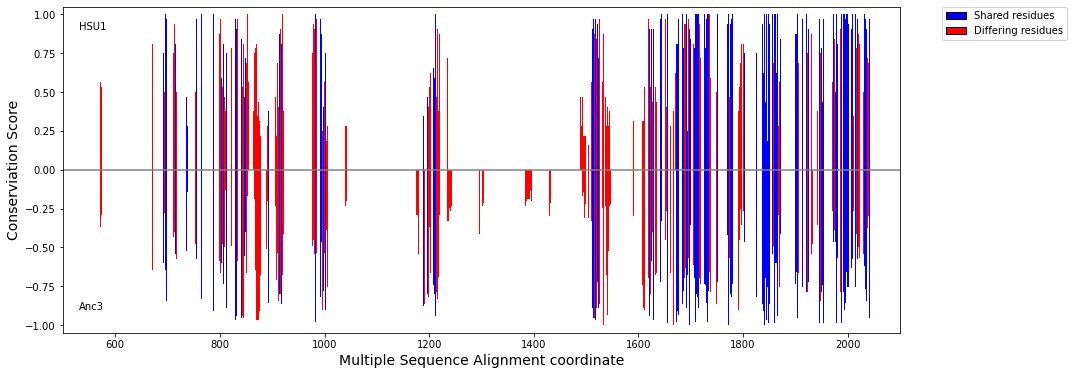

In [63]:
fig, ax = plt.subplots(1,1, figsize=(15,6))

msa_cons = pd.DataFrame.from_dict({'cons_bottom': cons_bottom,'cons_top': cons_top, 'same_res': same_res})

#Matching subset: 

msa_cons_match = msa_cons[msa_cons['same_res']]

ax.bar(msa_cons_match.index, msa_cons_match['cons_top'], color = 'blue')
ax.bar(msa_cons_match.index, -1*np.array(msa_cons_match['cons_bottom']), color = 'blue')


#Mismatch subset: 

msa_cons_mismatch = msa_cons[~msa_cons['same_res']]

ax.bar(msa_cons_mismatch.index, msa_cons_mismatch['cons_top'], color = 'red')
ax.bar(msa_cons_mismatch.index, -1*np.array(msa_cons_mismatch['cons_bottom']), color='red')

legend_elements = [Patch(facecolor='blue', edgecolor='k', label='Shared residues'), 
                   Patch(facecolor='red', edgecolor='k', label='Differing residues')
                  ]

xlims = [500,2100]
ax.set_ylim([-1.05, 1.05])
ax.set_xlim(xlims)
ax.text(530,0.90, 'HSU1')
ax.text(530,-0.90, 'Anc3')
ax.set_xlabel('Multiple Sequence Alignment coordinate', fontdict={'size':'14'})
ax.set_ylabel('Conserviation Score', fontdict={'size':'14'})
ax.hlines(0,xlims[0],xlims[1], colors='grey')
ax.legend(handles = legend_elements, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

fig.savefig(metproj_data_dir + 'HSU1_STR2_conservation.pdf', bbox_inches='tight')

In [65]:
fig.savefig(metproj_data_dir + 'HSU1_STR2_conservation.pdf', bbox_inches='tight')

In [157]:
key_res = msa_cons[(~msa_cons['same_res']) & (msa_cons['cons_top']>0.8) & (msa_cons['cons_bottom']>0.65) ].copy()

for seq in aln: 
    if seq.id == 'saccharomyces_cerevisiae_YJR130C':
        str2_seq = seq

msa_ind_map_str2 ={}
kk = 0
for jj, res in enumerate(str2_seq.seq):
    if res != '-':
        msa_ind_map_str2[jj] = kk
        kk = kk + 1
        
for seq in aln: 
    if seq.id == 'saccharomyces_cerevisiae_YLL058W':
        hsu1_seq = seq
        
msa_ind_map_hsu1 ={}
kk = 0
for jj, res in enumerate(hsu1_seq.seq):
    if res != '-':
        msa_ind_map_hsu1[jj] = kk
        kk = kk + 1
        
hsu1_res = []
hsu1_ind = []
str2_res = []
str2_ind = []
for ind in key_res.index:
    hsu1_res.append(conservation_full_dict['Anc4'][ind][1])
    str2_res.append(conservation_full_dict['Anc3'][ind][1])
    
    str2_ind.append(msa_ind_map_str2[ind] + 1)
    hsu1_ind.append(msa_ind_map_hsu1[ind] + 1)

key_res['HSU1'] = hsu1_res
key_res['HSU1_loc'] = hsu1_ind

key_res['STR2'] = str2_res
key_res['STR2_loc'] = str2_ind

key_res.rename(columns = {'cons_bottom': 'STR2_conservation', 'cons_top': 'HSU1_conservation'}, inplace=True)

key_res = key_res.loc[:,['HSU1', 'HSU1_loc', 'HSU1_conservation', 'STR2', 'STR2_loc', 'STR2_conservation']]
key_res.to_csv(metproj_data_dir + 'key_residue_diffs_HSU1_STR2.csv')